In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import ast
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

Загрузка данных и обработка признаков 

In [2]:
df = pd.read_csv('mvideo_features.csv')
df = df.drop_duplicates(subset=df.columns.difference(['product_id']), keep='first').reset_index(drop=True)


columns_needed = ['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза', 'Количество ядер', 'Технология экрана', 'Разрешение экрана', 'Экран',
                  "Степень защиты", "Разрешение видеосъемки", "Цифровой зум (x)", "Оперативная и встроенная память", 
                  "Вес (г)", "Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", "Мощность блока питания (Вт)", "Встроенная память (ROM) (ГБ)", 
                  'Диагональ дополнительного экрана (")','Разрешение по горизонтали в развернутом виде (Пикс)',
                  "Разрешение по вертикали в развернутом виде (Пикс)",'Диагональ в развернутом виде (")', 'Цвет', 'Оптическая стабилизация','Оптический зум на увеличение (x)',
                  "Разрешение дополнительного экрана по вертикали (Пикс)","Разрешение дополнительного экрана по горизонтали (Пикс)", 
                  'Поддержка быстрой зарядки', 'Емкость аккумулятора (мАч)', 'Поддержка беспроводной зарядки', 'brand', 'Встроенный искусственный интеллект',
                  'Гарантия предоставляется', 'Страна', 'Основная камера МПикс','Съемка видео в портретном режиме', 'Фронтальная камера МПикс',
                  'Количество основных камер (шт)', 'Состояние', 'Безрамочный', 'Материал корпуса']
target = ['salePrice']


df = df[columns_needed + target + ['product_id', 'name']]
df[["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)"]].head(3)
def choose(row):
    if '0' in str(row['memory2']):
        return row['memory2']
    if '0' in str(row['memory3']):
        return row['memory3']
    return row['memory4']

def get_memory(x):
    if type(x) == float:
        return x
    if type(x) == str:
        f = re.findall(r'[0-9]+', x)
        if type(f[-1]) == str:
            return float(f[-1])
    return x
def get_memory_from_name(x):
    if 'TB' in x:
        f = re.findall(r'[0-9/]+TB', x)
        return get_memory(f[0]) * 1024.0 if len(f) > 0 else np.nan
    if 'GB' in x:
        f = re.findall(r'[0-9/]+GB', x)
        return get_memory(f[0]) if len(f) > 0 else np.nan
    return np.nan

df['memory2'] = df["Оперативная и встроенная память"].apply(lambda x: get_memory(x))
df['memory3'] = df["Встроенная память (ROM) (ГБ)"].apply(lambda x: get_memory(x))
df['memory4'] = df["name"].apply(lambda x: get_memory_from_name(x))
df['memory'] = df.apply(choose, axis=1)

df = df.drop(columns=["Оперативная и встроенная память", "Встроенная память (ROM) (ГБ)", 'memory2', 'memory3', 'memory4'])
def get_height(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return x

def get_width(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return x


def get_depth(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if len(f) < 3:
            return np.nan
        if type(f[2]) == str:
            return float(f[2])
    return np.nan

def choose_h(row):
    if row['height1'] !=  np.nan:
        return row['height1']
    return row['height2']
def choose_w(row):
    if row['width1'] !=  np.nan:
        return row['width1']
    return row['width2']
def choose_d(row):
    if row['depth1'] !=  np.nan:
        return row['depth1']
    return row['depth2']


df['height1'] = df["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_height(x))
df['width1'] = df["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_width(x))
df['depth1'] = df["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_depth(x))

df['height2'] = df["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_height(x))
df['width2'] = df["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_width(x))
df['depth2'] = df["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_depth(x))

df['height'] = df.apply(choose_h, axis=1)
df['width'] = df.apply(choose_w, axis=1)
df['depth'] = df.apply(choose_d, axis=1)

df = df.drop(columns=["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", 'height1', 'height2', 'width1', 'width2', 'depth1', 'depth2'])

def get_res_0(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return 720.0

def get_res_1(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return 720.0



df['video_resolution_v'] = df["Разрешение видеосъемки"].apply(lambda x: get_res_1(x))
df['video_resolution_h'] = df["Разрешение видеосъемки"].apply(lambda x: get_res_0(x))

df['screen_resolution_h'] = df["Разрешение экрана"].apply(lambda x: get_res_0(x))
df['screen_resolution_v'] = df["Разрешение экрана"].apply(lambda x: get_res_1(x))

df['screen_diag'] = df["Экран"].apply(lambda x: np.nan if get_res_0(x) > 9.0 else get_res_0(x))


df = df.drop(columns=["Разрешение видеосъемки", "Разрешение экрана", "Экран"])

def get_dust_IP(x):
    if type(x) is str and x[:2] == 'IP':
        if x[2] == 'X':
            return np.nan
        return int(x[2])
    return 0.0

def get_water_IP(x):
    if type(x) is str and  x[:2] == 'IP':
        if x[3] == 'X':
            return np.nan
        return int(x[3])
    return 0.0


df['dust_IP'] = df["Степень защиты"].apply(lambda x: get_dust_IP(x))
df['water_IP'] = df["Степень защиты"].apply(lambda x: get_water_IP(x))

df = df.drop(columns=["Степень защиты"])

df['zoom'] = df['Цифровой зум (x)']
df['weight'] = df['Вес (г)']
df['kernel_cnt'] = df['Количество ядер']
df['screen_technology'] = df['Технология экрана']
df['power'] = df['Мощность блока питания (Вт)']

metals = ['металл', 'титан', 'алюм', 'сталь']
df['frame_has_metal'] = df['Материал корпуса'].apply(lambda x: any(metal in x.lower() for metal in metals) if type(x) == str else False).astype('int')
df['frame_has_plastic'] = df['Материал корпуса'].apply(lambda x: 'пластик' in x.lower() if type(x) == str else False ).astype('int')

df = df.drop(columns=["Цифровой зум (x)", "Вес (г)", "Количество ядер", "Технология экрана", "Мощность блока питания (Вт)", "Материал корпуса"])

In [3]:
df['is_new'] = df['Состояние'].apply(lambda x: 0 if x == 'восстановленный' else 1)
df = df.drop(columns=['Состояние'])

iphone_battery_capacity = {
    'iPhone 16 Pro': 3355,
    'iPhone 16 Pro Max': 4676,
    'iPhone 16': 3561,
    'iPhone 16 Plus': 4006,
    'iPhone 15 Pro': 3274,
    'iPhone 15 Pro Max': 4422,
    'iPhone 15': 3349,
    'iPhone 15 Plus': 4383,
    'iPhone 14 Pro': 3200,
    'iPhone 14 Pro Max': 4323,
    'iPhone 14': 3279,
    'iPhone 14 Plus': 4325,
    'iPhone 13 Pro': 3095,
    'iPhone 13 Pro Max': 4352,
    'iPhone 13': 3227,
    'iPhone 13 mini': 2406,
    'iPhone SE (2022)': 2018,
    'iPhone SE (2020)': 1821,
    'iPhone 12 Pro': 2815,
    'iPhone 12 Pro Max': 3687,
    'iPhone 12': 2815,
    'iPhone 12 mini': 2227,
    'iPhone 11 Pro': 3046,
    'iPhone 11 Pro Max': 3969,
    'iPhone 11': 3110,
    'iPhone XR': 2942,
    'iPhone XS': 2658,
    'iPhone XS Max': 3174,
    'iPhone X': 2716,
    'iPhone 8 Plus': 2691,
    'iPhone 8': 1821
}

normalized_battery_capacity = {
    model.lower().replace('iphone ', '').strip(): capacity
    for model, capacity in iphone_battery_capacity.items()
}

def fill_iphone_capacity(row):
    if pd.isna(row['Емкость аккумулятора (мАч)']):
        series = str(row['Серия']).lower().replace('iphone', '').replace('apple', '').strip()
        return normalized_battery_capacity.get(series, row['Емкость аккумулятора (мАч)'])
    return row['Емкость аккумулятора (мАч)']

df['standarts'] = df['Поддержка стандартов'].apply(lambda x: re.split(r'[ /]', str(x)))
df['battery'] = df.apply(fill_iphone_capacity, axis=1)
mean_battery = df['Емкость аккумулятора (мАч)'].mean()

df['is_5G'] = df['standarts'].apply(lambda x: '5G' in x if isinstance(x, list) else False)
df['is_5G'] = df['is_5G'].astype(int)

df['frameless'] = (df['Безрамочный'] == 'Да').astype(int)


def get_year(x):
    if x >= 2022.0:
        return int(x)
    return 2022

df['year'] = np.where(df['Год релиза'] != 2028, df['Год релиза'], 2023)
df['year'] = df['year'].apply(lambda x: get_year(x))

df = df.rename(columns={'Количество основных камер (шт)' : 'main_cams'})

In [4]:
# Список столбцов, где нужно заменить NaN на 0
columns_to_fill = [
    'Оптический зум на увеличение (x)'
]

df[columns_to_fill] = df[columns_to_fill].fillna(0)
df[['Съемка видео в портретном режиме','Оптическая стабилизация']] = df[['Съемка видео в портретном режиме', 'Оптическая стабилизация']].fillna("Нет")

# Преобразуем в список чисел
def parse_camera(s):
    mp_values = []
    for x in str(s).split('/'):
        if x.strip() == '0':
            continue
        try:
            # Пробуем преобразовать в число
            mp_values.append(float(x))
        except ValueError:
            # Если не число (например, "TOF"), пропускаем или добавляем 0
            continue
    return mp_values

df['camera_mp_parsed'] = df['Основная камера МПикс'].apply(parse_camera)
df['front_camera'] = df['Фронтальная камера МПикс'].apply(parse_camera)


df['opt_zoom'] = df['Оптический зум на увеличение (x)']
df = df.drop(columns=['Основная камера МПикс', 'Фронтальная камера МПикс', 'Страна',
                           'Оптический зум на увеличение (x)', 'Гарантия предоставляется','Оптическая стабилизация', 'Съемка видео в портретном режиме', 'Емкость аккумулятора (мАч)'])
df['front_camera_mp_total'] = df['front_camera'].apply(lambda x: sum(x) if isinstance(x, list) else 0)
df['main_camera_mp_total'] = df['camera_mp_parsed'].apply(lambda x: sum(x) if isinstance(x, list) else 0)

df = df.drop(columns=['front_camera', 'camera_mp_parsed'])

In [5]:
df['brand_Apple'] = (df['brand'] == 'Apple').astype(int)
df['brand_Samsung'] = (df['brand'] == 'Samsung').astype(int)
df['brand_Xiaomi'] = (df['brand'] == 'Xiaomi').astype(int)
df['brand_Tecno'] = (df['brand'] == 'Tecno').astype(int)
df['brand_HONOR'] = (df['brand'] == 'HONOR').astype(int)
df['brand_HUAWEI'] = (df['brand'] == 'HUAWEI').astype(int)
df['brand_Infinix'] = (df['brand'] == 'Infinix').astype(int)
df['strong_frame'] = df['frame_has_metal'] - df['frame_has_plastic']
df = df.drop(columns=['frame_has_metal', 'frame_has_plastic'])

df = df.drop(columns=['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза',
       'Диагональ дополнительного экрана (")',
       'Разрешение по горизонтали в развернутом виде (Пикс)',
       'Разрешение по вертикали в развернутом виде (Пикс)',
       'Диагональ в развернутом виде (")', 'Цвет',
       'Разрешение дополнительного экрана по вертикали (Пикс)',
       'Разрешение дополнительного экрана по горизонтали (Пикс)',
       'Поддержка быстрой зарядки',
       'Поддержка беспроводной зарядки', 'brand',
       'Встроенный искусственный интеллект',
       'Безрамочный', 'product_id', 'name', 'kernel_cnt', 'screen_technology', 'standarts', 'power'])

Мини проверки после предобработки 

In [6]:
import numpy as np
import pandas as pd

TARGET = "salePrice"

# 0.1) Проверим, что таргет есть и числовой
assert TARGET in df.columns
df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")

# 0.2) Уберем строки без таргета и с неадекватными ценами
df = df.dropna(subset=[TARGET]).copy()
df = df[df[TARGET] > 0].copy()

# 0.3) Проверим типы признаков: SVR требует числовые
X_raw = df.drop(columns=[TARGET])
non_numeric = X_raw.columns[X_raw.dtypes == "object"].tolist()
print("Object columns:", non_numeric)

# если вдруг остались object-колонки — их надо закодировать/почистить
# (в вашем пайплайне их, по идее, уже быть не должно)

Object columns: []


Трейн-тест сплит + лог таргет 

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[TARGET]).copy()
y = df[TARGET].astype(float).copy()

# Лог-таргет (рекомендую, для цены почти всегда лучше)
y_log = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.3, random_state=42
)

print(X_train.shape, X_test.shape)

(650, 30) (279, 30)


In [8]:
# Сколько пропусков в целом
nan_rate = X.isna().mean().sort_values(ascending=False)
print(nan_rate.head(15))

# Сколько строк имеют хотя бы один NaN
print("Rows with any NaN:", X.isna().any(axis=1).sum(), "out of", len(X))

zoom                     0.312164
depth                    0.286329
width                    0.285253
height                   0.285253
weight                   0.282024
screen_diag              0.032293
dust_IP                  0.026911
battery                  0.004306
main_camera_mp_total     0.002153
front_camera_mp_total    0.002153
screen_resolution_v      0.000000
video_resolution_v       0.000000
main_cams                0.000000
memory                   0.000000
water_IP                 0.000000
dtype: float64
Rows with any NaN: 570 out of 929


Модель 1: SVR

SVR: пайплайн + RepeatedKFold + подбор гиперпараметров

In [82]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

svr_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean", add_indicator=True)),
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf"))
])

param_dist = {
    "svr__C": np.logspace(1, 4, 30),
    "svr__gamma": np.logspace(-5, -1, 30),
    "svr__epsilon": [0.01, 0.05, 0.1, 0.2, 0.5]
}

search = RandomizedSearchCV(
    estimator=svr_pipe,
    param_distributions=param_dist,
    n_iter=60,
    scoring="neg_mean_absolute_error",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1,
    error_score="raise"   # чтобы сразу видеть реальные ошибки
)

search.fit(X_train, y_train)
svr_best = search.best_estimator_

print("Best params:", search.best_params_)
print("Best CV score (neg MAE on log target):", search.best_score_)

Fitting 15 folds for each of 60 candidates, totalling 900 fits
Best params: {'svr__gamma': np.float64(0.014873521072935119), 'svr__epsilon': 0.01, 'svr__C': np.float64(221.22162910704503)}
Best CV score (neg MAE on log target): -0.09169247549376093


In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_on_test(model, X_test, y_test_log):
    pred_log = model.predict(X_test)
    y_true = np.expm1(y_test_log)
    y_pred = np.expm1(pred_log)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

def evaluate_on_test_log(model, X_test, y_test_log):
    pred_log = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test_log, pred_log))
    mae = mean_absolute_error(y_test_log, pred_log)
    r2 = r2_score(y_test_log, pred_log)
    return rmse, mae, r2

rmse, mae, r2 = evaluate_on_test(svr_best, X_test, y_test)
print(f"SVR TEST: RMSE={rmse:,.0f} | MAE={mae:,.0f} | R2={r2:.4f}")

rmse, mae, r2 = evaluate_on_test_log(svr_best, X_test, y_test)
print(f"SVR TEST: RMSE={rmse:,.4f} | MAE={mae:,.4f} | R2={r2:.4f}")

SVR TEST: RMSE=9,711 | MAE=3,866 | R2=0.9643
SVR TEST: RMSE=0.1337 | MAE=0.0714 | R2=0.9765


In [84]:
from sklearn.inspection import permutation_importance
import pandas as pd

perm = permutation_importance(
    svr_best,
    X_test,     # именно DataFrame с 30 исходными колонками
    y_test,
    scoring="neg_mean_absolute_error",
    n_repeats=30,
    random_state=42,
    n_jobs=-1
)

imp_df = pd.DataFrame({
    "feature": X_test.columns,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

imp_df.head(20)

,feature,importance_mean,importance_std
15,battery,0.183952,0.010837
2,height,0.160851,0.009969
3,width,0.115660,0.008802
7,screen_resolution_h,0.110400,0.007761
8,screen_resolution_v,0.104172,0.007707
21,main_camera_mp_total,0.102856,0.011028
13,weight,0.100042,0.005375
1,memory,0.096420,0.007191
4,depth,0.091896,0.005543
16,is_5G,0.089768,0.006235


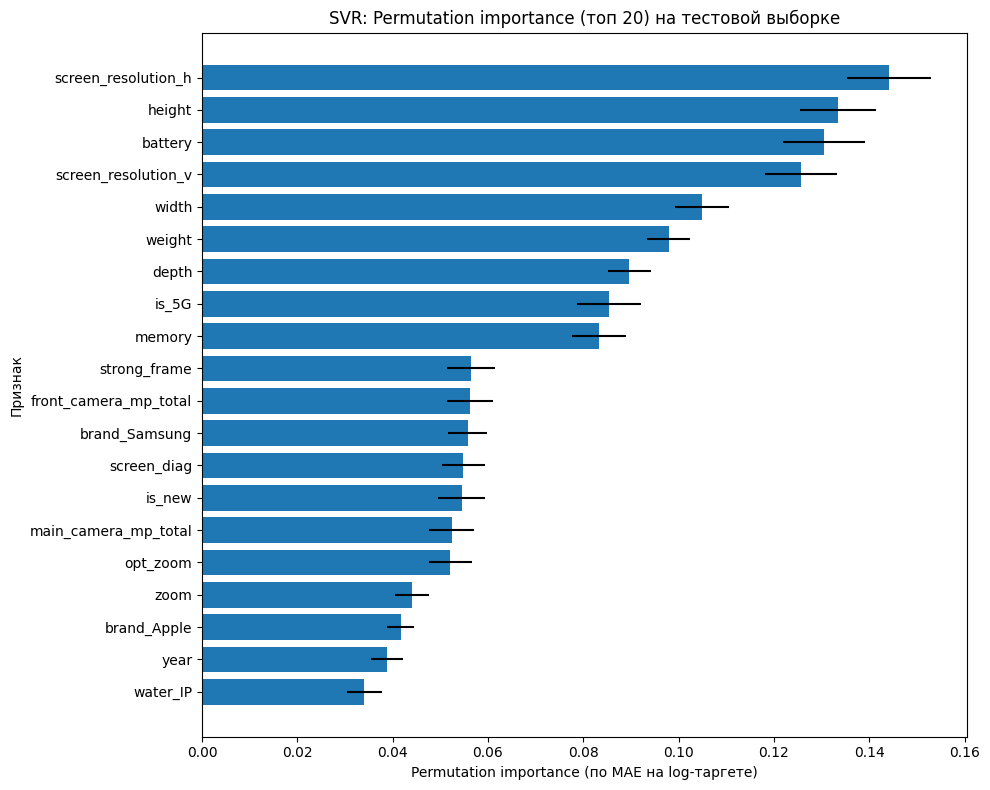

In [71]:
import matplotlib.pyplot as plt

top_k = 20
plot_df = imp_df.head(top_k).iloc[::-1]  # перевернем для красивого графика

plt.figure(figsize=(10, 8))
plt.barh(plot_df["feature"], plot_df["importance_mean"], xerr=plot_df["importance_std"])
plt.xlabel("Permutation importance (по MAE на log-таргете)")
plt.ylabel("Признак")
plt.title(f"SVR: Permutation importance (топ {top_k}) на тестовой выборке")
plt.tight_layout()
plt.show()

In [72]:
import shap
import numpy as np

# фоновые данные (baseline)
X_background = shap.sample(X_train, 100, random_state=42)

# объясняем 50 тестовых объектов
X_explain = X_test.sample(50, random_state=42)

# функция предсказания в исходной шкале (рубли)
def predict_price(X):
    return np.expm1(svr_best.predict(X))

explainer = shap.KernelExplainer(predict_price, X_background)

shap_values = explainer.shap_values(X_explain, nsamples=200)

shap.summary_plot(shap_values, X_explain)

 68%|██████▊   | 34/50 [00:52<00:24,  1.56s/it]


KeyboardInterrupt: 

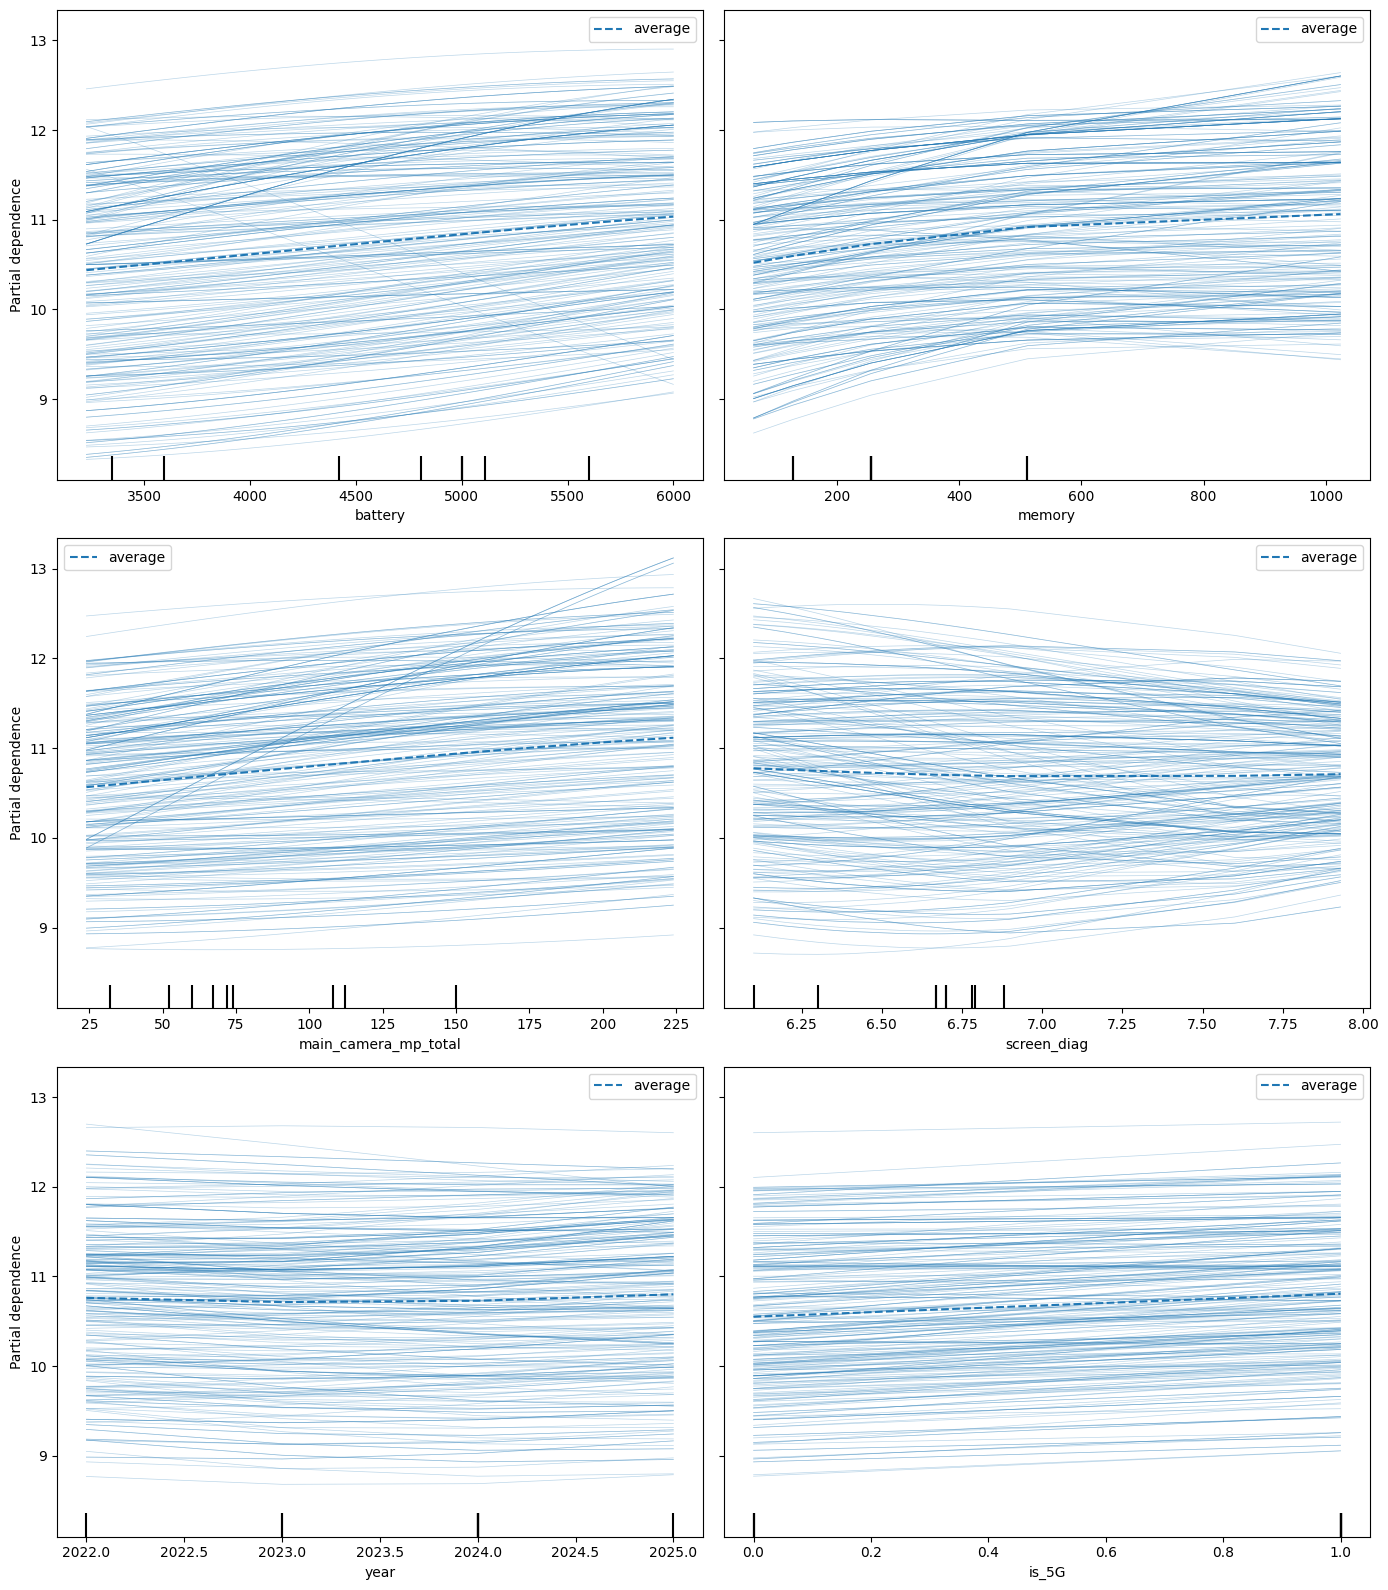

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features_for_pdp = ["battery", "memory", "main_camera_mp_total",
                    "screen_diag", "year", "is_5G"]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))

PartialDependenceDisplay.from_estimator(
    svr_best,
    X_test,
    features=features_for_pdp,
    kind="both",          # PDP + ICE
    grid_resolution=40,
    ax=ax
)

plt.tight_layout()
plt.show()

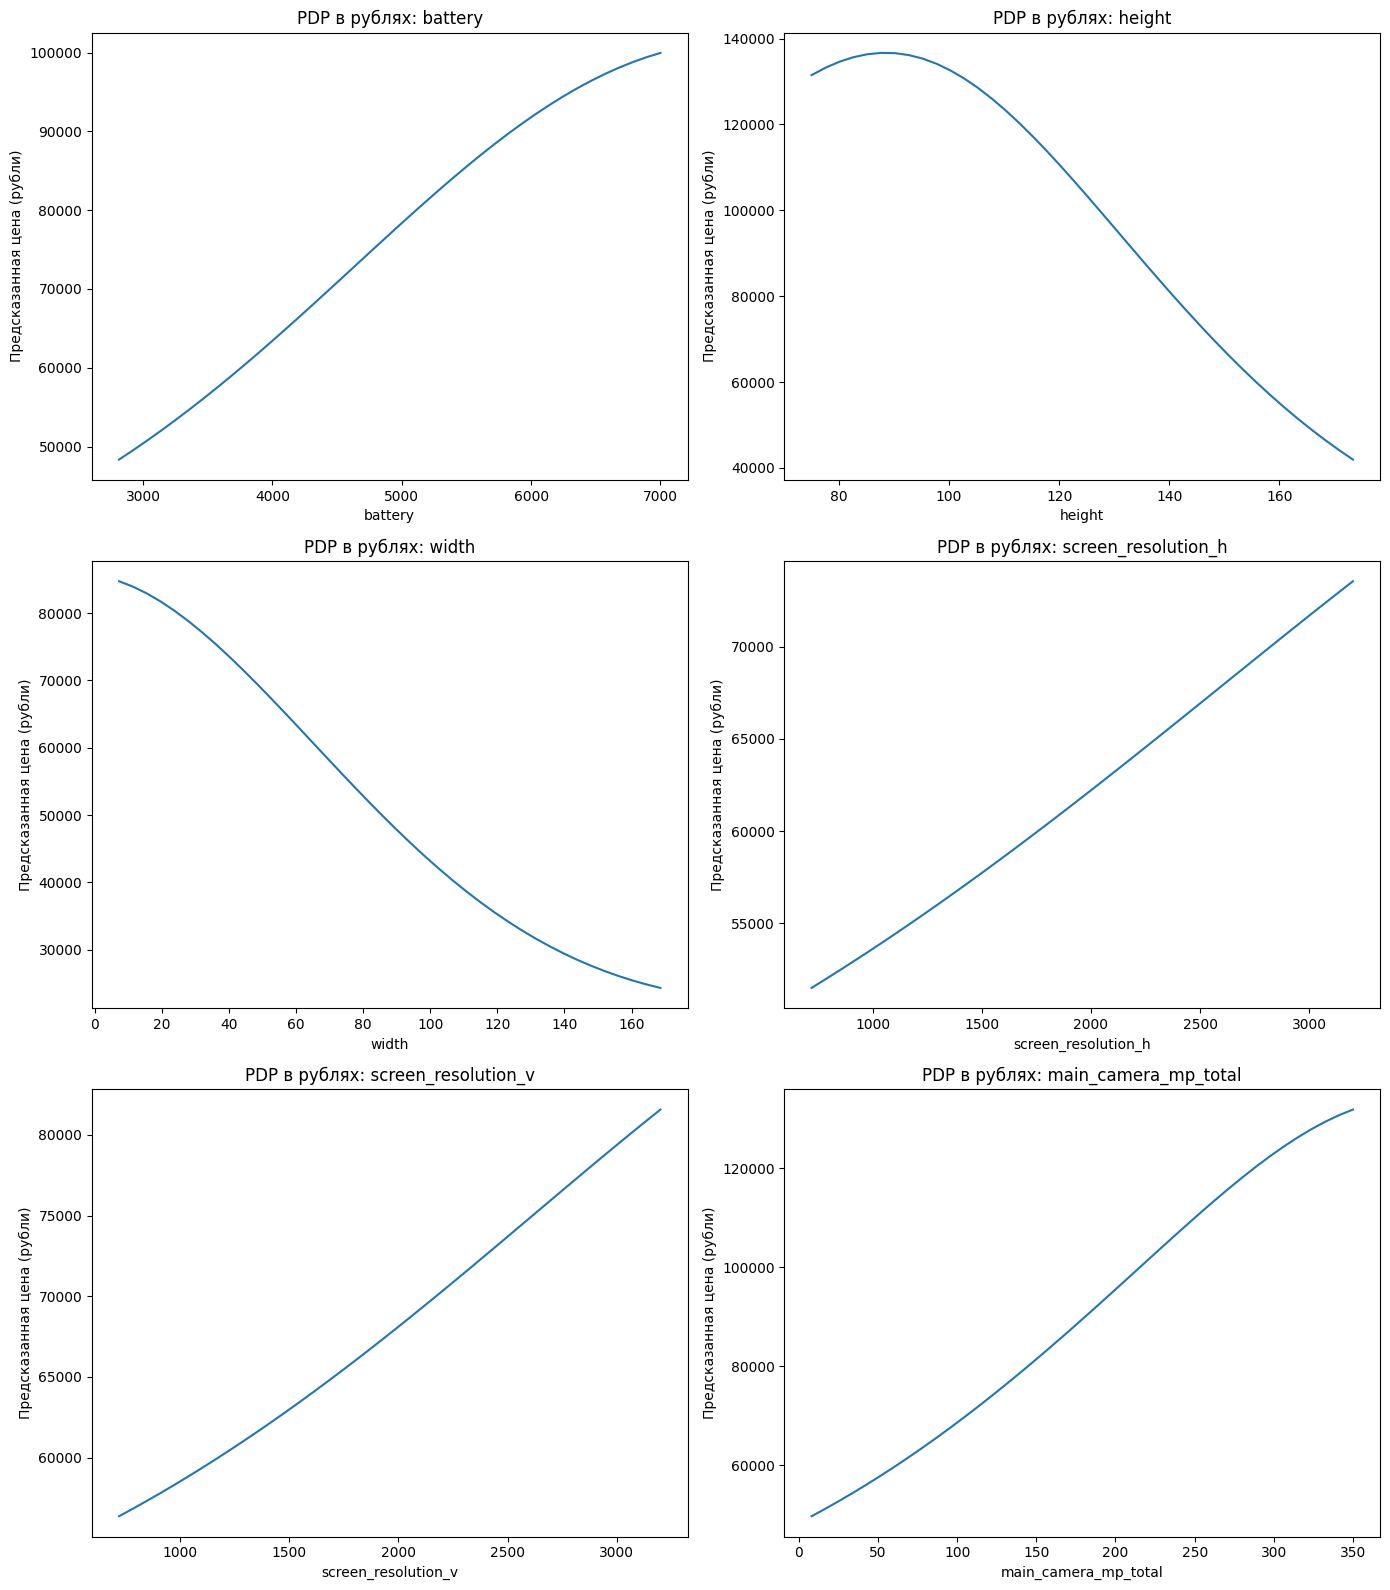

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def pdp_in_rubles(model, X_ref, feature, grid_points=40):
    X_tmp = X_ref.copy()
    grid = np.linspace(X_ref[feature].min(), X_ref[feature].max(), grid_points)

    preds = []
    for val in grid:
        X_tmp[feature] = val
        pred_log = model.predict(X_tmp)
        pred = np.expm1(pred_log)
        preds.append(pred.mean())

    return grid, np.array(preds)


# battery	0.183952	0.010837
# 2	height	0.160851	0.009969
# 3	width	0.115660	0.008802
# 7	screen_resolution_h	0.110400	0.007761
# 8	screen_resolution_v	0.104172	0.007707
# 21	main_camera_mp_total

features_for_pdp = ["battery", "height", "width", "screen_resolution_h", "screen_resolution_v", "main_camera_mp_total"]

fig, axes = plt.subplots(3, 2, figsize=(14, 16))
axes = axes.flatten()

for i, feature in enumerate(features_for_pdp):
    grid, preds = pdp_in_rubles(svr_best, X_test, feature)
    
    axes[i].plot(grid, preds)
    axes[i].set_title(f"PDP в рублях: {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Предсказанная цена (рубли)")
    
plt.tight_layout()
plt.show()

In [91]:
import numpy as np
import matplotlib.pyplot as plt

svr_model = svr_best.named_steps["svr"]
eps = svr_model.epsilon

# предсказания в лог-шкале
pred_train = svr_best.predict(X_train)
pred_test  = svr_best.predict(X_test)

abs_err_train = np.abs(y_train - pred_train)
abs_err_test  = np.abs(y_test  - pred_test)

print("SVR epsilon (log target):", eps)
print("Share within epsilon tube (train):", (abs_err_train <= eps).mean())
print("Share within epsilon tube (test): ", (abs_err_test <= eps).mean())

# доля support vectors
n_sv = len(svr_model.support_)
print("Support vectors:", n_sv, "out of", X_train.shape[0], "=> share:", n_sv / X_train.shape[0])

SVR epsilon (log target): 0.01
Share within epsilon tube (train): 0.4230769230769231
Share within epsilon tube (test):  0.2724014336917563
Support vectors: 481 out of 650 => share: 0.74


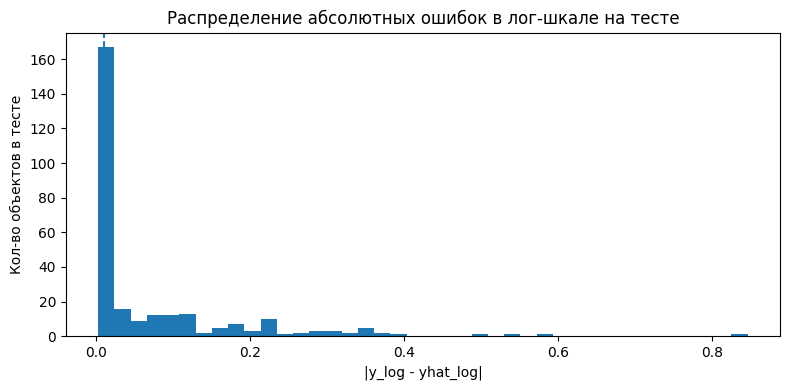

In [92]:
plt.figure(figsize=(8,4))
plt.hist(abs_err_test, bins=40)
plt.axvline(eps, linestyle="--")
plt.xlabel("|y_log - yhat_log|")
plt.ylabel("Кол-во объектов в тесте")
plt.title("Распределение абсолютных ошибок в лог-шкале на тесте")
plt.tight_layout()
plt.show()

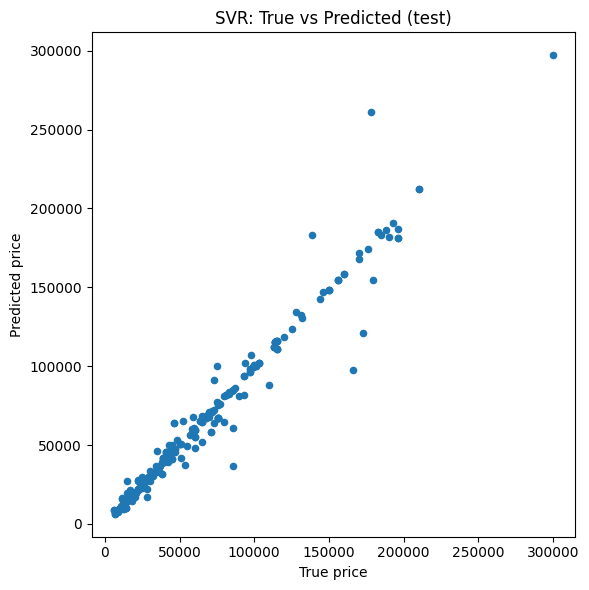

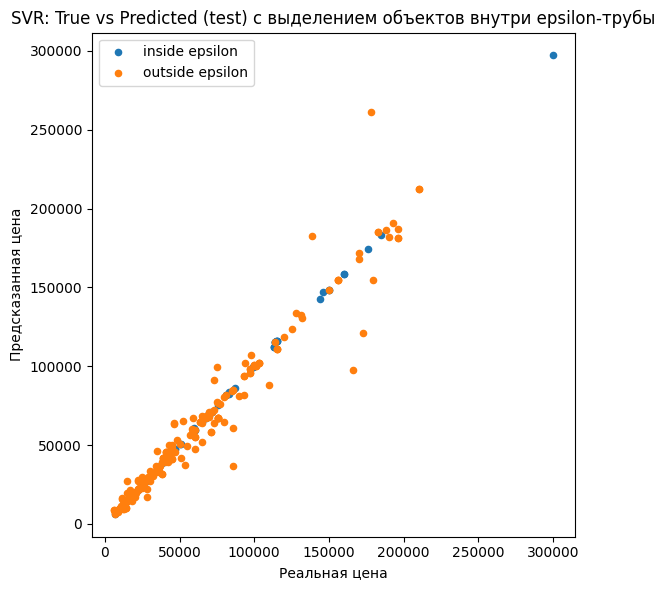

In [93]:
inside = abs_err_test <= eps

plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(pred_test), s=20)
plt.xlabel("True price")
plt.ylabel("Predicted price")
plt.title("SVR: True vs Predicted (test)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test[inside]), np.expm1(pred_test[inside]), s=20, label="inside epsilon")
plt.scatter(np.expm1(y_test[~inside]), np.expm1(pred_test[~inside]), s=20, label="outside epsilon")
plt.xlabel("Реальная цена")
plt.ylabel("Предсказанная цена")
plt.title("SVR: True vs Predicted (test) с выделением объектов внутри epsilon-трубы")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

def predict_price_rub(model, X_df):
    pred_log = model.predict(X_df)
    return np.expm1(pred_log)

def local_report(model, X_row, y_true_log=None, feature_steps=None):
    """
    X_row: pd.Series (одна строка признаков)
    y_true_log: float (если есть истинная цена в логах)
    feature_steps: dict, например {"battery": [ -500, 0, +500 ], "memory":[-64,0,+64]}
    """
    X0 = X_row.to_frame().T

    base_pred = float(predict_price_rub(model, X0)[0])
    report = {
        "base_pred_price": base_pred
    }
    if y_true_log is not None:
        report["true_price"] = float(np.expm1(y_true_log))
        report["abs_error"] = abs(report["true_price"] - base_pred)

    rows = []
    if feature_steps:
        for feat, steps in feature_steps.items():
            for step in steps:
                X1 = X0.copy()
                X1[feat] = X1[feat] + step
                pred1 = float(predict_price_rub(model, X1)[0])
                rows.append({
                    "feature": feat,
                    "step": step,
                    "new_value": float(X1[feat].iloc[0]),
                    "pred_price": pred1,
                    "delta_price": pred1 - base_pred
                })

    return report, pd.DataFrame(rows).sort_values(["feature","step"])

# пример использования:
# возьмем один объект из теста
idx = X_test.index[0]
X_row = X_test.loc[idx]
y_true_log = y_test.loc[idx]

report, whatif_df = local_report(
    svr_best,
    X_row,
    y_true_log=y_true_log,
    feature_steps={
        "battery": [-500, 0, 500],
        "memory": [-64, 0, 64],
        "main_camera_mp_total": [-12, 0, 12],
        "screen_diag": [-0.3, 0, 0.3],
        "year": [-1, 0, 1],
        "is_5G": [0, 1]  # тут лучше задать явно, см. ниже
    }
)

print(report)
display(whatif_df.head(30))

{'base_pred_price': 65657.24133345547, 'true_price': 64989.99999999999, 'abs_error': 667.2413334554803}


,feature,step,new_value,pred_price,delta_price
0,battery,-500.0,2727.0,52304.832520,-13352.408813
1,battery,0.0,3227.0,65657.241333,0.000000
2,battery,500.0,3727.0,81905.995206,16248.753872
15,is_5G,0.0,1.0,65657.241333,0.000000
16,is_5G,1.0,2.0,62432.567309,-3224.674025
6,main_camera_mp_total,-12.0,12.0,61434.675675,-4222.565659
7,main_camera_mp_total,0.0,24.0,65657.241333,0.000000
8,main_camera_mp_total,12.0,36.0,70157.895123,4500.653790
3,memory,-64.0,64.0,55476.576395,-10180.664939
4,memory,0.0,128.0,65657.241333,0.000000


In [ ]:
test_prices = np.expm1(y_test)
cheap_idx = test_prices.idxmin()
mid_idx = (test_prices - test_prices.median()).abs().idxmin()
exp_idx = test_prices.idxmax()

for idx in [cheap_idx, mid_idx, exp_idx]:
    rep, wf = local_report(
        svr_best,
        X_test.loc[idx],
        y_true_log=y_test.loc[idx],
        feature_steps={"battery":[-500,500], "memory":[-64,64], "year":[-1,1]}
    )
    print("INDEX:", idx, rep)
    display(wf.head(20))

INDEX: 66 {'base_pred_price': 8619.563118770593, 'true_price': 5998.999999999995, 'abs_error': 2620.5631187705976}


,feature,step,new_value,pred_price,delta_price
0,battery,-500,4500.0,7160.176608,-1459.386511
1,battery,500,5500.0,10544.381699,1924.818580
2,memory,-64,0.0,7367.184414,-1252.378705
3,memory,64,128.0,9974.898109,1355.334990
4,year,-1,2023.0,9280.397839,660.834720
5,year,1,2025.0,8763.564427,144.001308


INDEX: 817 {'base_pred_price': 45735.512856005145, 'true_price': 46989.999999999985, 'abs_error': 1254.4871439948402}


,feature,step,new_value,pred_price,delta_price
0,battery,-500,4500.0,42169.990457,-3565.522399
1,battery,500,5500.0,49552.457497,3816.944641
2,memory,-64,192.0,43078.816646,-2656.696210
3,memory,64,320.0,48423.576553,2688.063697
4,year,-1,2023.0,43653.284388,-2082.228468
5,year,1,2025.0,51718.919540,5983.406684


INDEX: 478 {'base_pred_price': 297049.352499958, 'true_price': 299998.9999999999, 'abs_error': 2949.6475000418723}


,feature,step,new_value,pred_price,delta_price
0,battery,-500,5100.0,274713.492319,-22335.860180
1,battery,500,6100.0,313433.321322,16383.968822
2,memory,-64,960.0,289974.759958,-7074.592542
3,memory,64,1088.0,301790.833761,4741.481261
4,year,-1,2024.0,314804.148559,17754.796059
5,year,1,2026.0,270473.653184,-26575.699316


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.80s/it]



INDEX: 66
True price = 5,999
Pred price = 8,620
Abs error  = 2,621


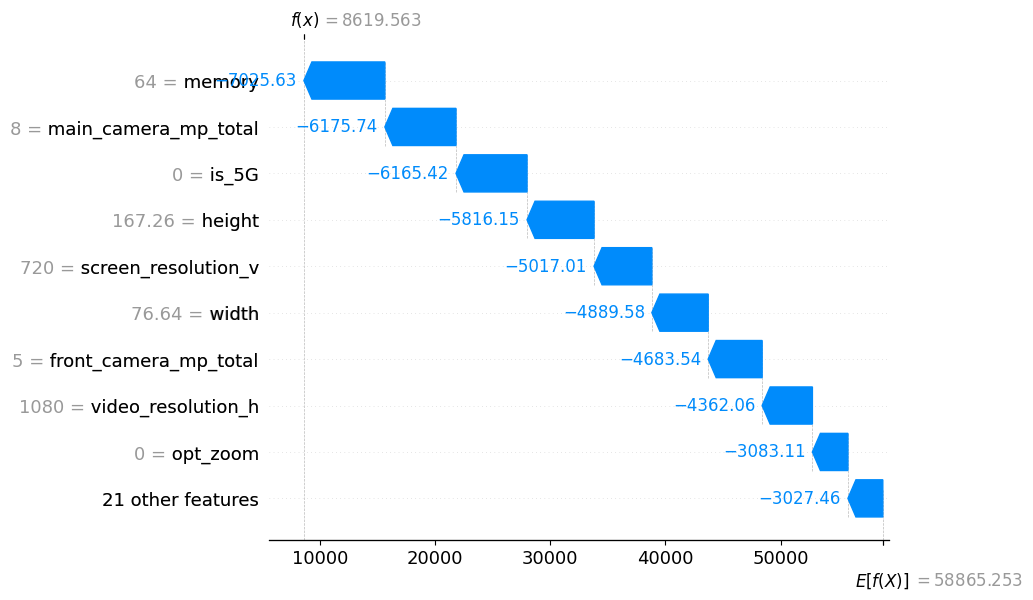

<Figure size 640x480 with 0 Axes>

100%|██████████| 1/1 [00:01<00:00,  1.31s/it]



INDEX: 817
True price = 46,990
Pred price = 45,736
Abs error  = 1,254


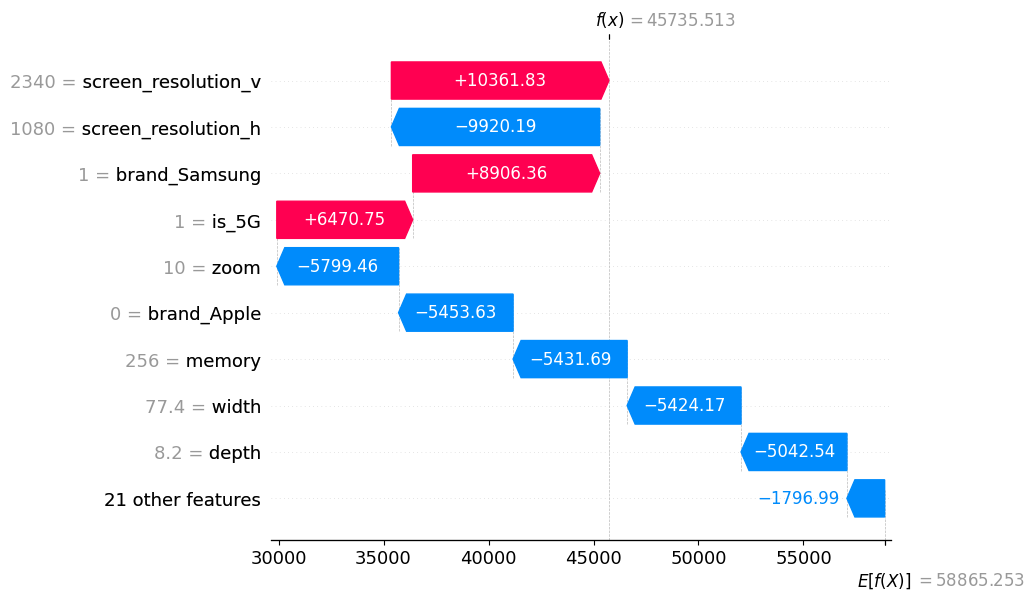

<Figure size 640x480 with 0 Axes>

100%|██████████| 1/1 [00:01<00:00,  1.95s/it]



INDEX: 478
True price = 299,999
Pred price = 297,049
Abs error  = 2,950


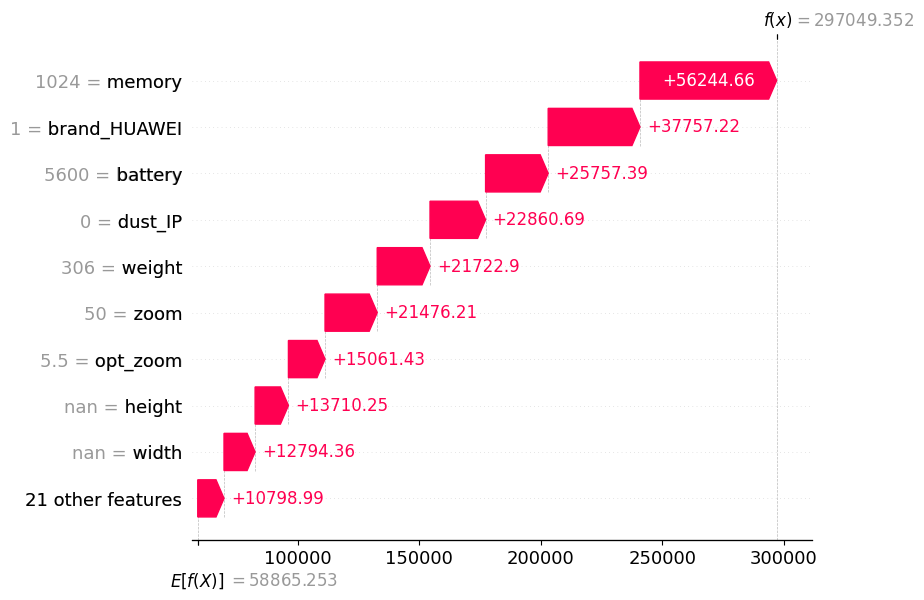

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

X_background = shap.sample(X_train, 100, random_state=42)

def predict_price(X):
    return np.expm1(svr_best.predict(X))

explainer = shap.KernelExplainer(predict_price, X_background)

test_prices = np.expm1(y_test)
cheap_idx = test_prices.idxmin()
mid_idx = (test_prices - test_prices.median()).abs().idxmin()
exp_idx = test_prices.idxmax()

selected_idx = [cheap_idx, mid_idx, exp_idx]

for idx in selected_idx:
    X_row = X_test.loc[idx:idx]
    shap_values = explainer.shap_values(X_row, nsamples=200)

    true_price = float(np.expm1(y_test.loc[idx]))
    pred_price = float(predict_price(X_row)[0])

    print("\nINDEX:", idx)
    print(f"True price = {true_price:,.0f}")
    print(f"Pred price = {pred_price:,.0f}")
    print(f"Abs error  = {abs(true_price - pred_price):,.0f}")

    # создаём Explanation объект
    explanation = shap.Explanation(
        values=shap_values[0],
        base_values=explainer.expected_value,
        data=X_row.iloc[0],
        feature_names=X_row.columns
    )

    plt.figure()
    shap.plots.waterfall(explanation, max_display=10)
    plt.tight_layout()
    plt.show()

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence

def plot_2d_pdp_grid(
    model,                 # pipeline или модель
    X_ref,                 # DataFrame
    pairs,                 # list of tuples: [(f1, f2), ...] где f1,f2 имена колонок
    top_k=6,
    ncols=2,
    grid_resolution=25,
    figsize=(14, 12),
    title="2D PDP (joint effect)"
):
    """
    Рисует heatmap 2D PDP для заданных пар признаков.
    Работает для SVR pipeline (imputer+scaler+svr) и любых sklearn-моделей.
    PDP строится в шкале модели (у тебя — log1p(price)); переводим в рубли.
    """
    selected = pairs[:top_k]
    nrows = int(np.ceil(len(selected) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = np.array(axes).reshape(-1)

    for i, (f1, f2) in enumerate(selected):
        ax = axes[i]

        pd_res = partial_dependence(
            estimator=model,
            X=X_ref,
            features=[f1, f2],          # <-- вот так
            grid_resolution=grid_resolution,
            kind="average"
        )

        # pd_res["average"] shape: (1, n_x, n_y)
        Z_log = pd_res["average"][0]
        x = pd_res["grid_values"][0]
        y = pd_res["grid_values"][1]

        # в рубли
        Z_price = np.expm1(Z_log)

        im = ax.imshow(
            Z_price.T,
            origin="lower",
            aspect="auto",
            interpolation="nearest"
        )

        ax.set_title(f"{f1} × {f2}", fontsize=10)
        ax.set_xlabel(f1)
        ax.set_ylabel(f2)

        # sparse ticks
        def sparse_ticks(vals, max_ticks=6):
            n = len(vals)
            if n <= max_ticks:
                idx = np.arange(n)
            else:
                idx = np.linspace(0, n - 1, max_ticks).astype(int)
            labels = [f"{vals[j]:.0f}" for j in idx]
            return idx, labels

        xi, xl = sparse_ticks(x, 6)
        yi, yl = sparse_ticks(y, 6)

        ax.set_xticks(xi)
        ax.set_xticklabels(xl, rotation=0)
        ax.set_yticks(yi)
        ax.set_yticklabels(yl)

        cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        cbar.ax.set_ylabel("Predicted price (RUB)", rotation=90)

    for k in range(len(selected), len(axes)):
        axes[k].axis("off")

    plt.suptitle(title, y=1.02)
    plt.tight_layout()
    plt.show()

In [39]:
X_test

,main_cams,memory,height,width,depth,video_resolution_v,video_resolution_h,screen_resolution_h,screen_resolution_v,screen_diag,...,front_camera_mp_total,main_camera_mp_total,brand_Apple,brand_Samsung,brand_Xiaomi,brand_Tecno,brand_HONOR,brand_HUAWEI,brand_Infinix,strong_frame
756,2,128.0,NaN,NaN,NaN,2160.0,3840.0,1170.0,2532.0,6.10,...,12.0,24.00,1,0,0,0,0,0,0,1
669,2,128.0,NaN,NaN,NaN,2160.0,3840.0,2556.0,1179.0,6.10,...,12.0,60.00,1,0,0,0,0,0,0,1
30,2,128.0,NaN,NaN,NaN,2160.0,3840.0,2556.0,1179.0,6.10,...,12.0,60.00,1,0,0,0,0,0,0,1
388,1,256.0,167.88,75.63,7.70,1440.0,2560.0,2460.0,1080.0,6.78,...,8.0,50.00,0,0,0,0,0,0,1,-1
192,3,128.0,161.00,75.00,8.00,1080.0,1920.0,1080.0,2400.0,6.67,...,16.0,210.00,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2,128.0,168.00,76.43,7.70,1080.0,1920.0,2436.0,1080.0,6.78,...,8.0,64.08,0,0,0,1,0,0,0,-1
442,3,128.0,162.20,77.50,7.40,720.0,720.0,720.0,720.0,NaN,...,12.0,67.00,0,1,0,0,0,0,0,0
409,3,128.0,161.10,77.40,8.20,2160.0,3840.0,2340.0,1080.0,6.60,...,32.0,67.00,0,1,0,0,0,0,0,1
408,1,256.0,165.50,76.13,7.88,1080.0,1920.0,1080.0,2436.0,6.78,...,32.0,108.00,0,0,0,1,0,0,0,-1


In [51]:
X_test.columns

Index(['main_cams', 'memory', 'height', 'width', 'depth', 'video_resolution_v',
       'video_resolution_h', 'screen_resolution_h', 'screen_resolution_v',
       'screen_diag', 'dust_IP', 'water_IP', 'zoom', 'weight', 'is_new',
       'battery', 'is_5G', 'frameless', 'year', 'opt_zoom',
       'front_camera_mp_total', 'main_camera_mp_total', 'brand_Apple',
       'brand_Samsung', 'brand_Xiaomi', 'brand_Tecno', 'brand_HONOR',
       'brand_HUAWEI', 'brand_Infinix', 'strong_frame'],
      dtype='object')

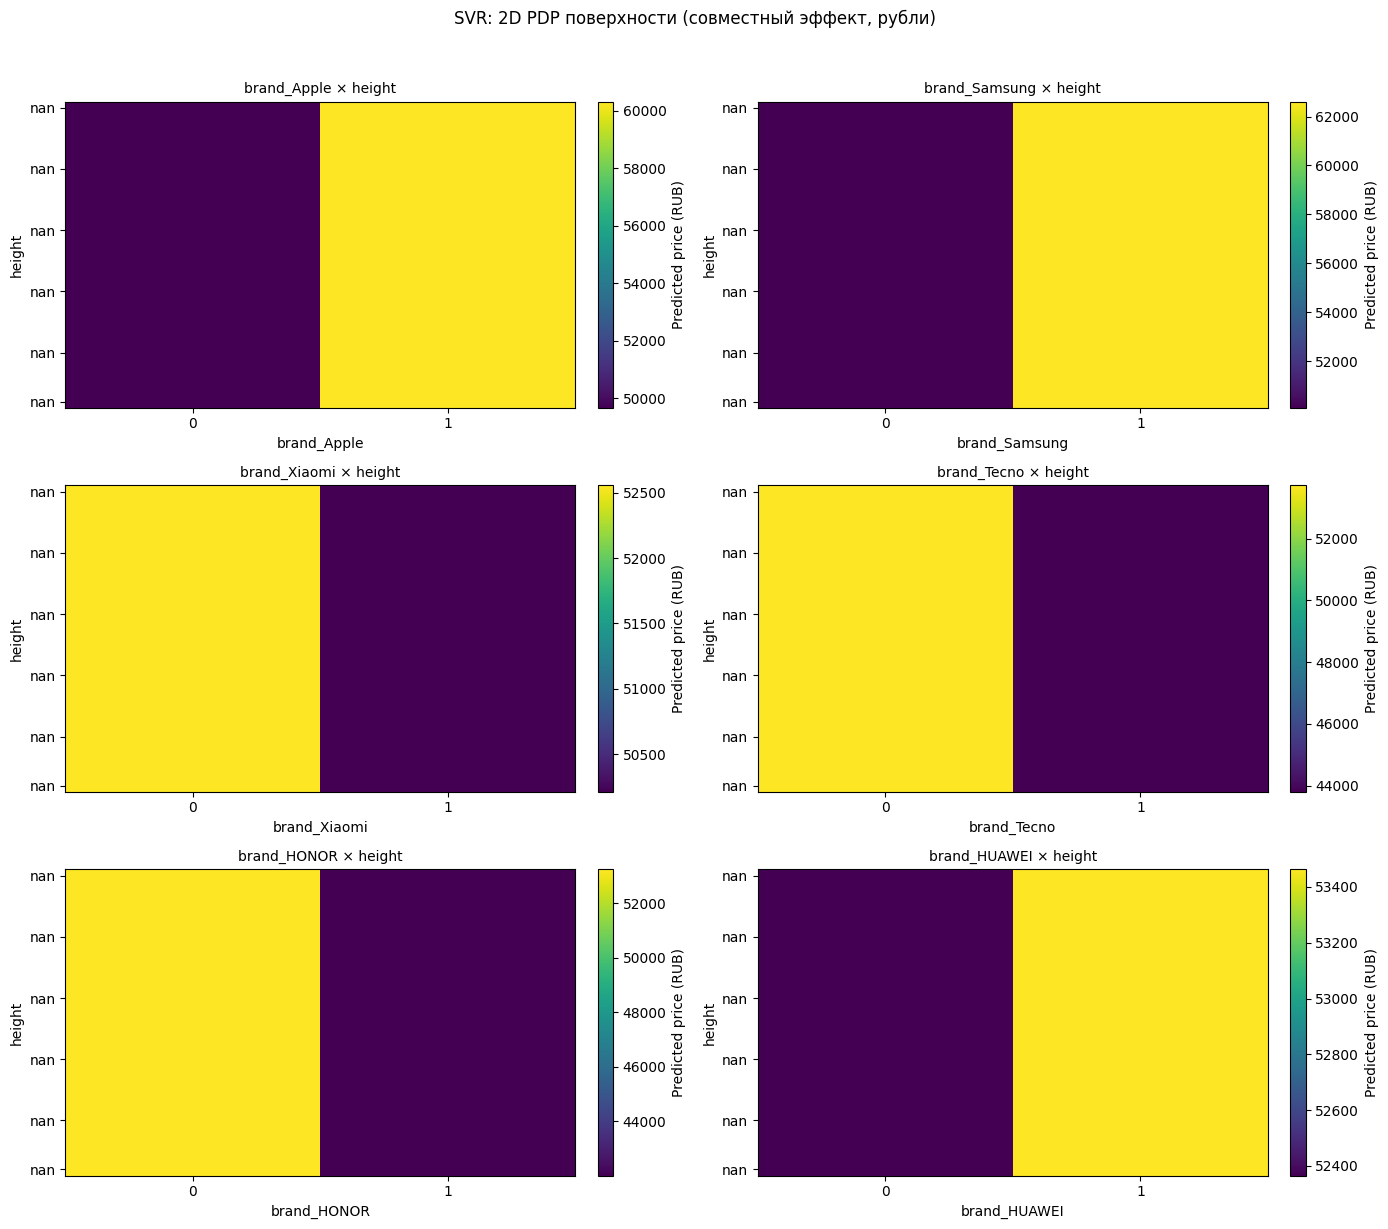

In [94]:
svr_pairs = [
    ["brand_Apple", "height"],
    ["brand_Samsung", "height"],
    ["brand_Xiaomi", "height"], 
    ["brand_Tecno", "height"],
    ["brand_HONOR", "height"],
    ["brand_HUAWEI", "height"],
    ["brand_Infinix", "height"],
]

plot_2d_pdp_grid(
    model=svr_best,
    X_ref=X_train,
    pairs=svr_pairs,
    top_k=6,
    ncols=2,
    grid_resolution=25,
    figsize=(14, 12),
    title="SVR: 2D PDP поверхности (совместный эффект, рубли)"
)

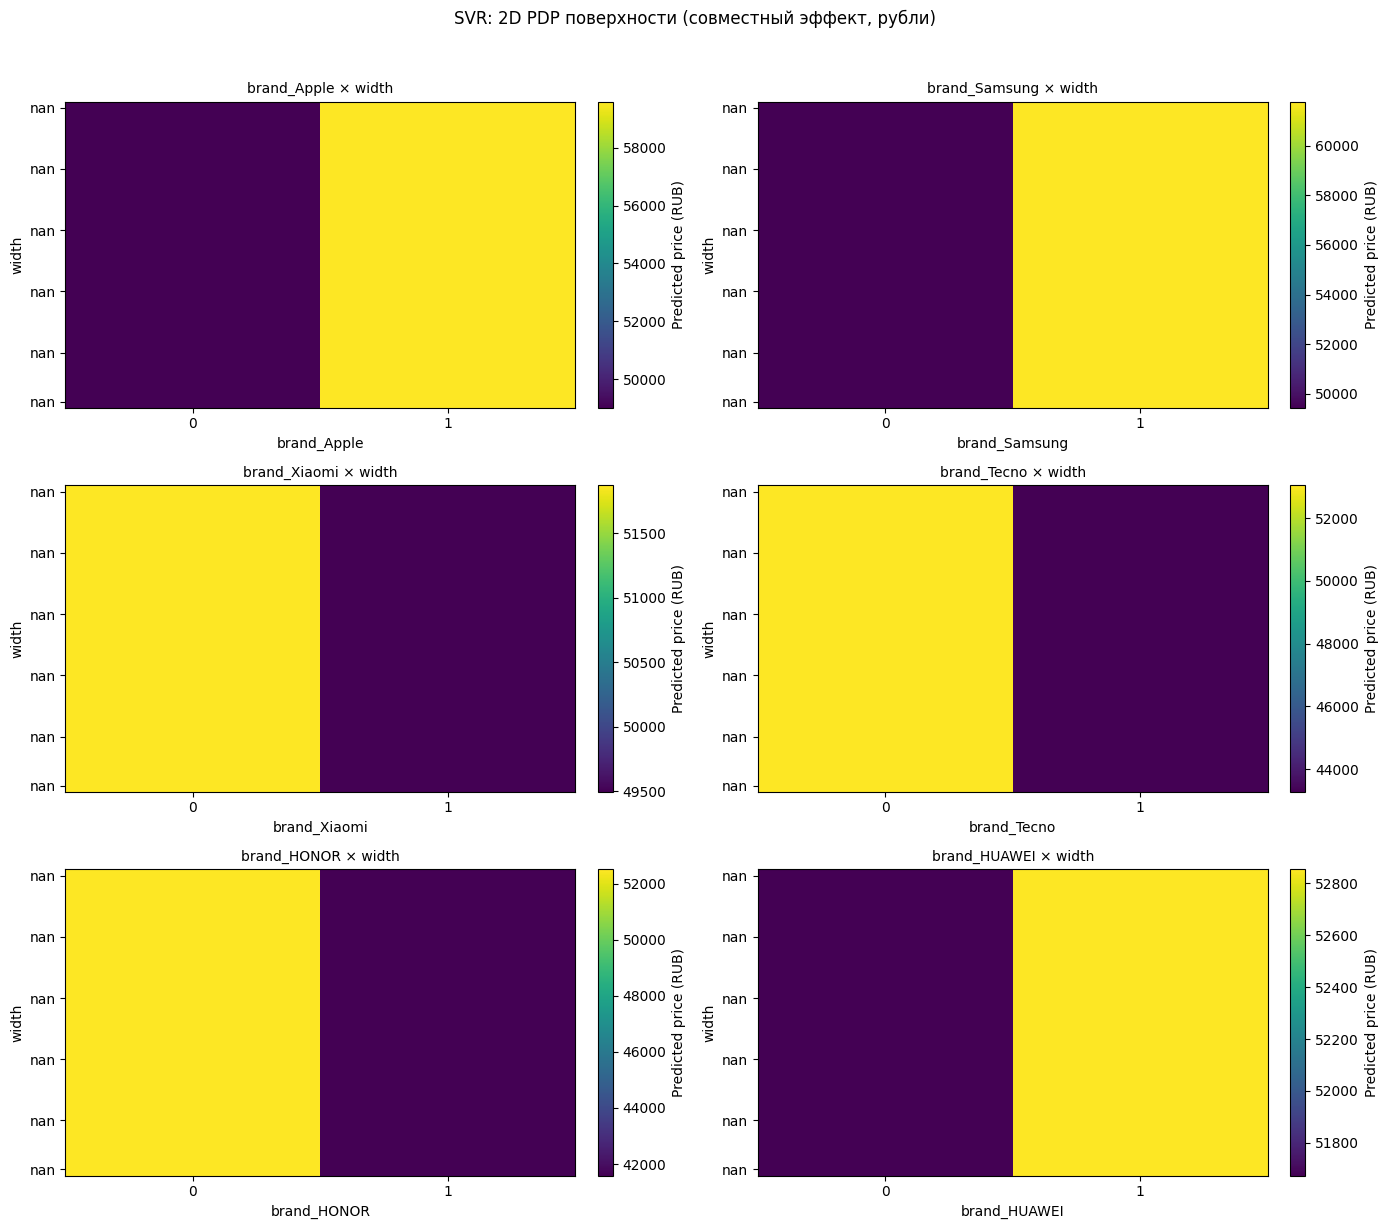

In [95]:
svr_pairs = [
    ["brand_Apple", "width"],
    ["brand_Samsung", "width"],
    ["brand_Xiaomi", "width"], 
    ["brand_Tecno", "width"],
    ["brand_HONOR", "width"],
    ["brand_HUAWEI", "width"],
    ["brand_Infinix", "width"],
]

plot_2d_pdp_grid(
    model=svr_best,
    X_ref=X_train,
    pairs=svr_pairs,
    top_k=6,
    ncols=2,
    grid_resolution=25,
    figsize=(14, 12),
    title="SVR: 2D PDP поверхности (совместный эффект, рубли)"
)

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from PyALE import ale
except ImportError:
    from PyALE import ale


def ale_safe(model, X, feature, grid_size=40, feature_type=None, include_CI=False):
    # 1) Убираем строки, где именно этот признак NaN/inf
    mask = X[feature].notna() & np.isfinite(X[feature].astype(float))
    X_sub = X.loc[mask].copy()

    # 2) Для бинарных/мало-уникальных признаков делаем discrete + маленький grid
    nunique = X_sub[feature].nunique(dropna=True)

    if feature_type is None:
        if nunique <= 10:
            feature_type = "discrete"
        else:
            feature_type = "continuous"

    if feature_type == "discrete":
        grid_size = min(grid_size, max(nunique, 2))

    plt.figure(figsize=(8, 4))
    res = ale(
        X=X_sub,
        model=model,
        feature=[feature],
        feature_type=feature_type,
        grid_size=grid_size,
        include_CI=include_CI
    )
    plt.axhline(0, linestyle="--", linewidth=1)
    plt.title(f"ALE: {feature} ({feature_type}) | n={len(X_sub)}")
    plt.xlabel(feature)
    plt.ylabel("Effect on log1p(price)")
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()

    return res

<Figure size 800x400 with 0 Axes>

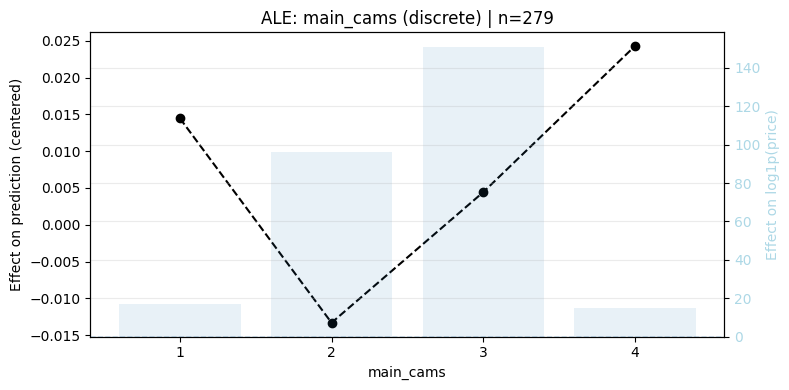

<Figure size 800x400 with 0 Axes>

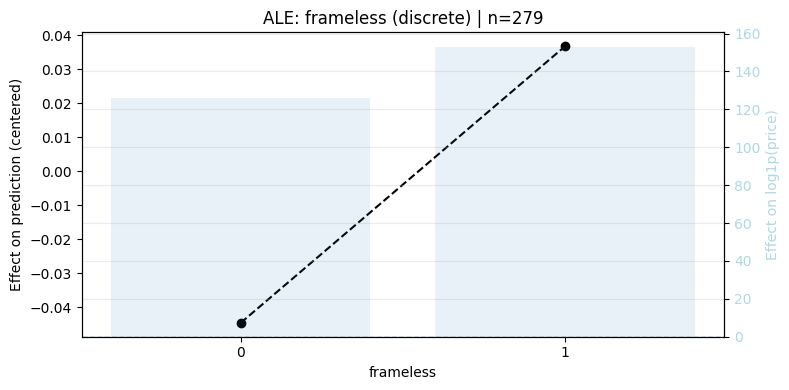

<Figure size 800x400 with 0 Axes>

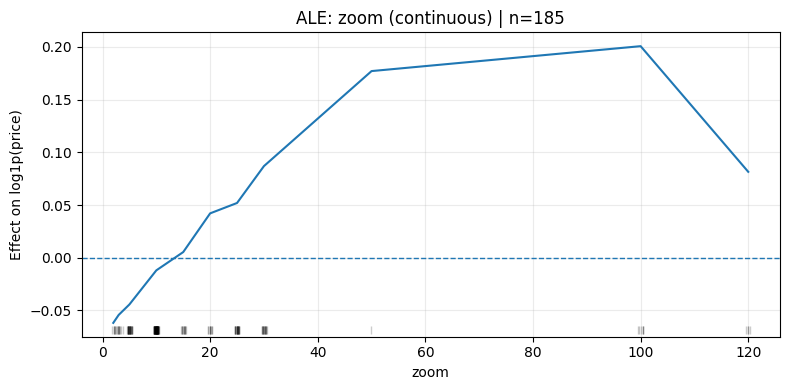

<Figure size 800x400 with 0 Axes>

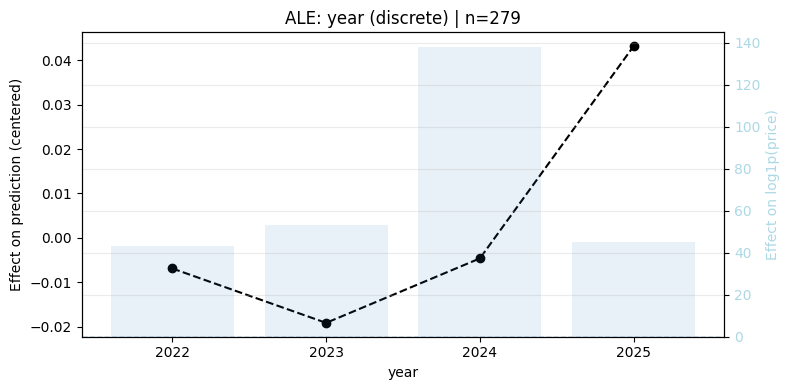

<Figure size 800x400 with 0 Axes>

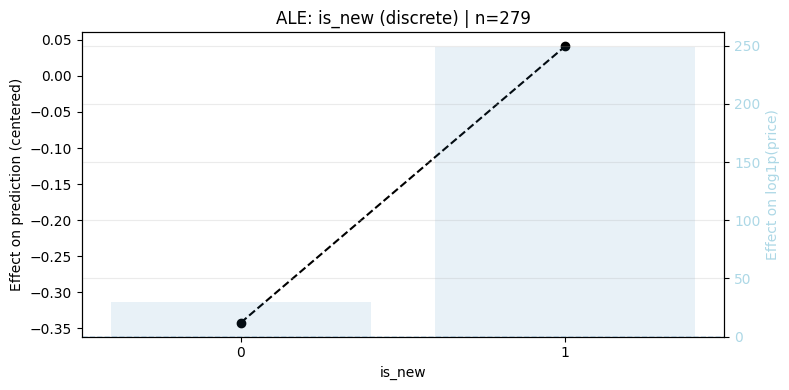

In [48]:
features_for_ale = plot_df.head(5)["feature"].tolist()

for feat in features_for_ale:
    ale_safe(svr_best, X_test, feat, grid_size=40, include_CI=False)

CatBoost 

In [73]:
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

cb_params = {
    "iterations": 5000,          # ставим больше, но остановит early stopping
    "learning_rate": 0.05,
    "depth": 5,
    "l2_leaf_reg": 10,
    "loss_function": "MAE",
    "random_seed": 42,
    "verbose": False
}

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

fold_metrics = []
best_iters = []

for fold, (tr_idx, val_idx) in enumerate(cv.split(X_train)):
    X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]   # log1p
    
    model = CatBoostRegressor(**cb_params)
    model.fit(
        X_tr, y_tr,
        eval_set=(X_val, y_val),
        early_stopping_rounds=200,
        use_best_model=True
    )
    
    pred_val_log = model.predict(X_val)
    y_true = np.expm1(y_val)
    y_pred = np.expm1(pred_val_log)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    
    fold_metrics.append([rmse, mae, r2])
    best_iters.append(model.get_best_iteration())
    
    print(f"Fold {fold:02d}: RMSE={rmse:,.0f} | MAE={mae:,.0f} | R2={r2:.4f} | best_iter={best_iters[-1]}")

fold_metrics = np.array(fold_metrics)

print("\nCV mean ± std:")
print(f"RMSE: {fold_metrics[:,0].mean():,.0f} ± {fold_metrics[:,0].std():,.0f}")
print(f"MAE : {fold_metrics[:,1].mean():,.0f} ± {fold_metrics[:,1].std():,.0f}")
print(f"R2  : {fold_metrics[:,2].mean():.4f} ± {fold_metrics[:,2].std():.4f}")

print("\nBest iteration: mean ± std =", np.mean(best_iters), "±", np.std(best_iters))

Fold 00: RMSE=21,834 | MAE=6,887 | R2=0.8264 | best_iter=1466
Fold 01: RMSE=7,240 | MAE=3,045 | R2=0.9750 | best_iter=4991
Fold 02: RMSE=22,548 | MAE=6,357 | R2=0.8141 | best_iter=1740
Fold 03: RMSE=10,919 | MAE=4,603 | R2=0.9655 | best_iter=3181
Fold 04: RMSE=9,293 | MAE=4,303 | R2=0.9586 | best_iter=4999
Fold 05: RMSE=21,290 | MAE=5,532 | R2=0.7992 | best_iter=4101
Fold 06: RMSE=13,157 | MAE=5,386 | R2=0.9414 | best_iter=3771
Fold 07: RMSE=6,329 | MAE=3,124 | R2=0.9851 | best_iter=4324
Fold 08: RMSE=11,115 | MAE=4,702 | R2=0.9453 | best_iter=3683
Fold 09: RMSE=19,827 | MAE=5,673 | R2=0.8665 | best_iter=4999
Fold 10: RMSE=11,518 | MAE=4,348 | R2=0.9492 | best_iter=4984
Fold 11: RMSE=20,911 | MAE=5,244 | R2=0.8329 | best_iter=4450
Fold 12: RMSE=28,973 | MAE=7,284 | R2=0.7445 | best_iter=4646
Fold 13: RMSE=7,037 | MAE=3,726 | R2=0.9805 | best_iter=4951
Fold 14: RMSE=9,328 | MAE=4,467 | R2=0.9591 | best_iter=4912

CV mean ± std:
RMSE: 14,755 ± 6,864
MAE : 4,979 ± 1,210
R2  : 0.9029 ± 0.0

In [78]:
best_iter = int(np.mean(best_iters))

final_cb = CatBoostRegressor(
    iterations=best_iter,
    learning_rate=0.05,
    depth=5,
    l2_leaf_reg=10,
    loss_function="RMSE",
    random_seed=42,
    verbose=False
)

final_cb.fit(X_train, y_train)   # ← без eval_set

CatBoostRegressor(depth=5, iterations=4079, l2_leaf_reg=10, learning_rate=0.05, loss_function='RMSE', random_seed=42, verbose=False)

In [79]:
rmse, mae, r2 = evaluate_on_test(final_cb, X_test, y_test)
print(f"Catboost TEST: RMSE={rmse:,.0f} | MAE={mae:,.0f} | R2={r2:.4f}")

rmse, mae, r2 = evaluate_on_test_log(final_cb, X_test, y_test)
print(f"Catboost TEST (log): RMSE={rmse:,.4f} | MAE={mae:,.4f} | R2={r2:.4f}")

Catboost TEST: RMSE=8,882 | MAE=3,406 | R2=0.9701
Catboost TEST (log): RMSE=0.1219 | MAE=0.0589 | R2=0.9805


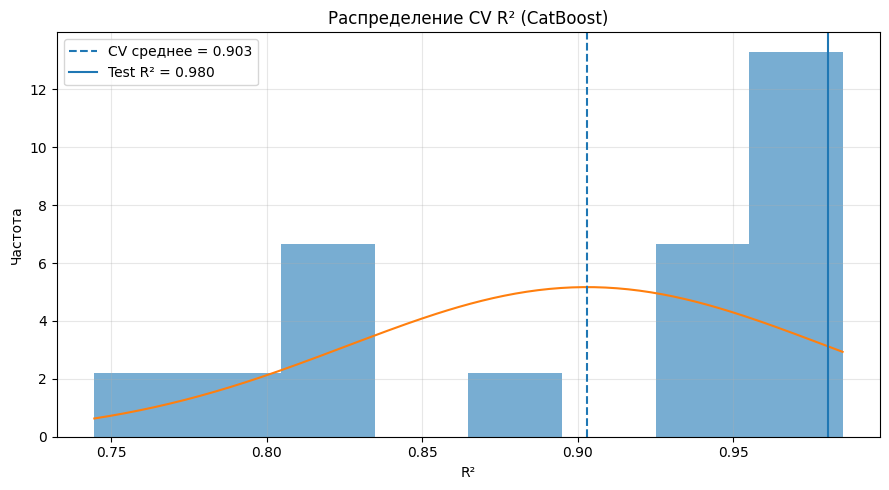

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

r2_scores = fold_metrics[:, 2]

mean_r2 = r2_scores.mean()
std_r2 = r2_scores.std()

plt.figure(figsize=(9, 5))

# Гистограмма с нормированной плотностью
plt.hist(r2_scores, bins=8, density=True, alpha=0.6)

# Нормальная кривая по mean/std
x = np.linspace(r2_scores.min(), r2_scores.max(), 200)
plt.plot(x, norm.pdf(x, mean_r2, std_r2))

# Линии среднего CV и test
plt.axvline(mean_r2, linestyle="--", label=f"CV среднее = {mean_r2:.3f}")
plt.axvline(r2, linestyle="-", label=f"Test R² = {r2:.3f}")

plt.xlabel("R²")
plt.ylabel("Частота")
plt.title("Распределение CV R² (CatBoost)")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

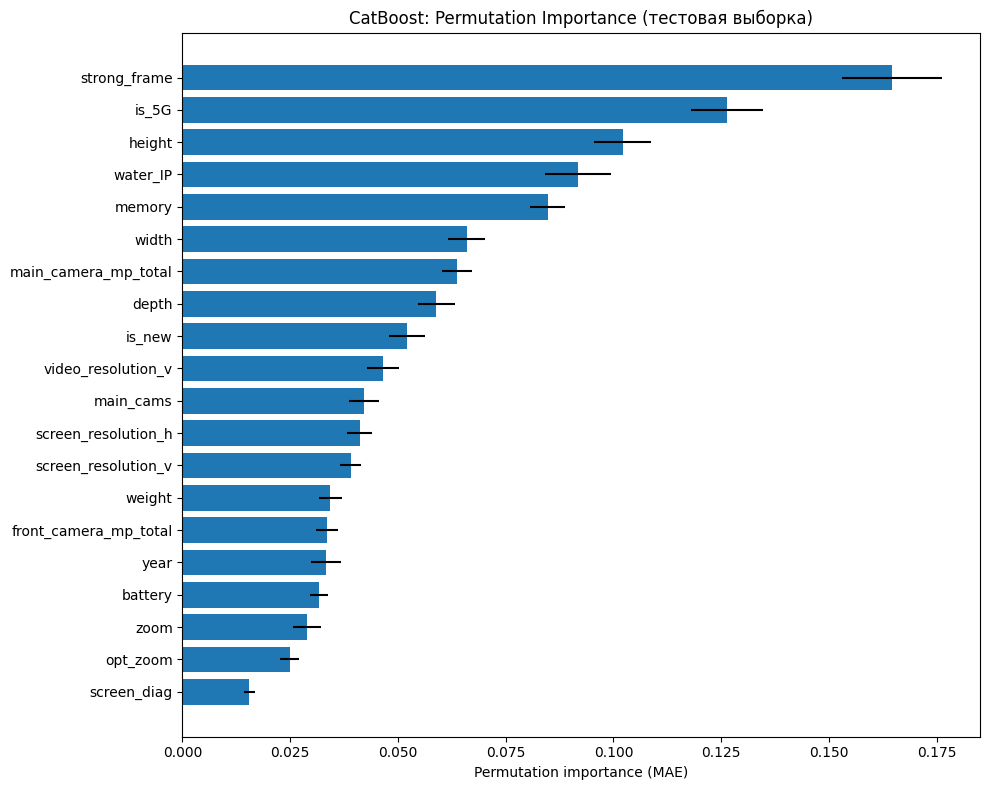

,feature,importance_mean,importance_std
29,strong_frame,0.164670,0.011575
16,is_5G,0.126337,0.008262
2,height,0.102155,0.006572
11,water_IP,0.091806,0.007603
1,memory,0.084756,0.004058
3,width,0.065910,0.004208
21,main_camera_mp_total,0.063710,0.003491
4,depth,0.058878,0.004259
14,is_new,0.052092,0.004072
5,video_resolution_v,0.046492,0.003686


In [81]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

perm = permutation_importance(
    final_cb,
    X_test,
    y_test,   # лог-шкала (как обучали)
    scoring="neg_mean_absolute_error",
    n_repeats=30,
    random_state=42,
    n_jobs=-1
)

imp_df_cb = pd.DataFrame({
    "feature": X_test.columns,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

# Красивый график
top_k = 20
plot_df = imp_df_cb.head(top_k).iloc[::-1]

plt.figure(figsize=(10, 8))
plt.barh(plot_df["feature"], plot_df["importance_mean"],
         xerr=plot_df["importance_std"])
plt.xlabel("Permutation importance (MAE)")
plt.title("CatBoost: Permutation Importance (тестовая выборка)")
plt.tight_layout()
plt.show()

imp_df_cb.head(15)

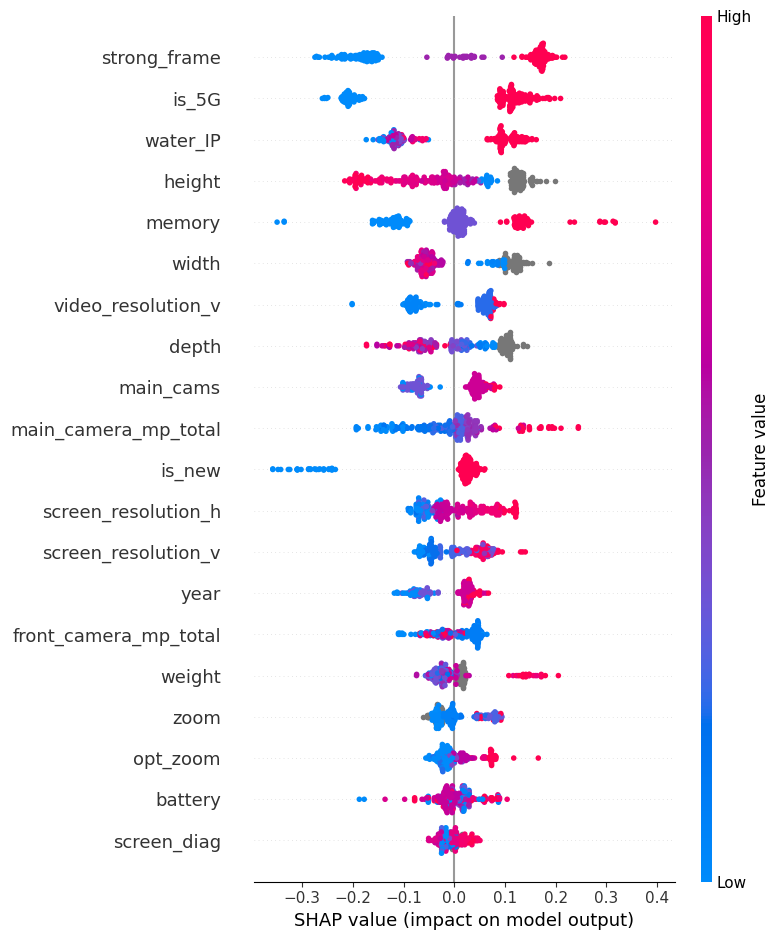

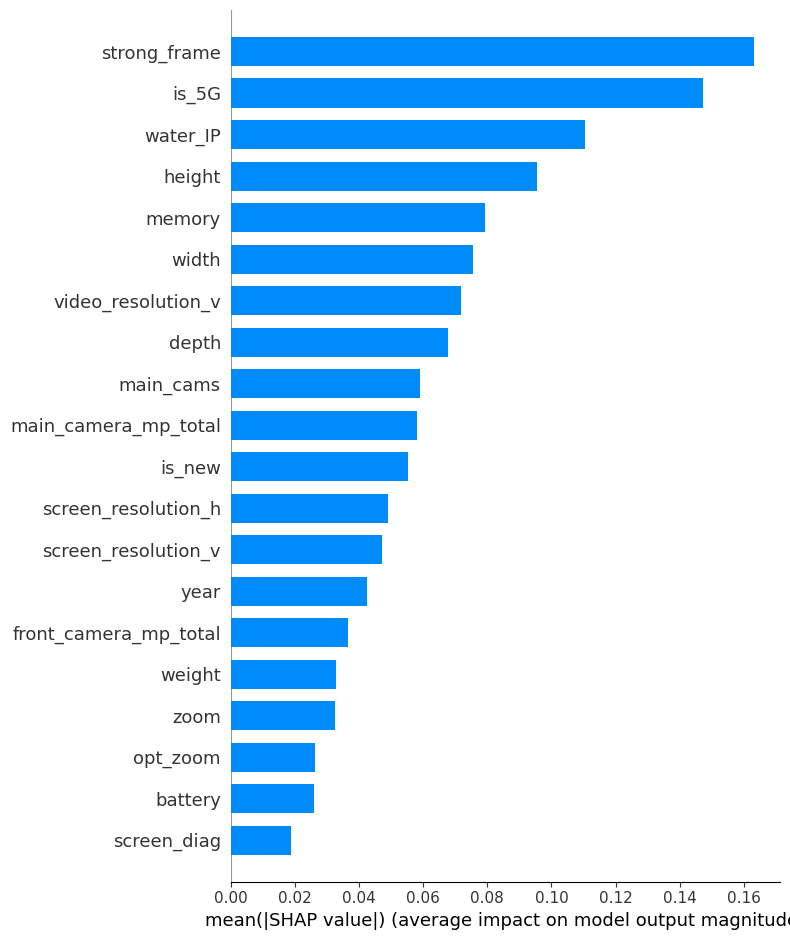

In [85]:
import shap

explainer = shap.TreeExplainer(final_cb)
shap_values = explainer.shap_values(X_test)

# Summary plot (beeswarm)
shap.summary_plot(shap_values, X_test)

# Bar importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

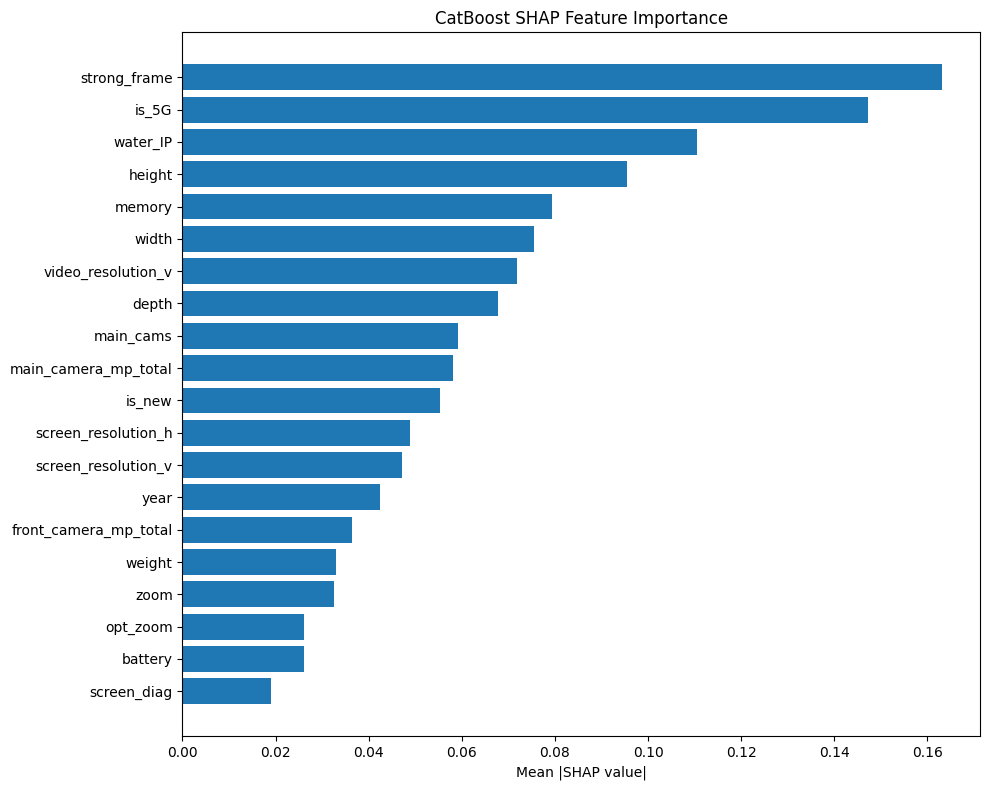

,feature,mean_abs_shap
29,strong_frame,0.163125
16,is_5G,0.147316
11,water_IP,0.110437
2,height,0.095376
1,memory,0.079263
3,width,0.075508
5,video_resolution_v,0.071885
4,depth,0.067685
0,main_cams,0.059079
21,main_camera_mp_total,0.058143


In [86]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(final_cb)
shap_values = explainer.shap_values(X_test)

# Mean absolute SHAP values
mean_abs_shap = np.abs(shap_values).mean(axis=0)

shap_df = pd.DataFrame({
    "feature": X_test.columns,
    "mean_abs_shap": mean_abs_shap
}).sort_values("mean_abs_shap", ascending=False)

plt.figure(figsize=(10,8))
plt.barh(shap_df["feature"].head(20)[::-1],
         shap_df["mean_abs_shap"].head(20)[::-1])
plt.title("CatBoost SHAP Feature Importance")
plt.xlabel("Mean |SHAP value|")
plt.tight_layout()
plt.show()

shap_df.head(15)


INDEX: 66


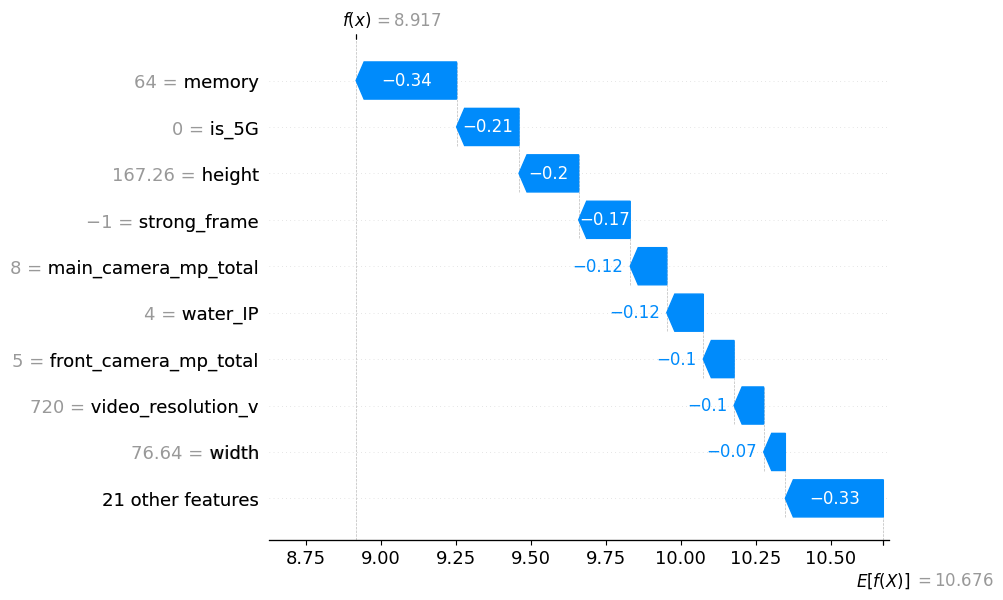


INDEX: 817


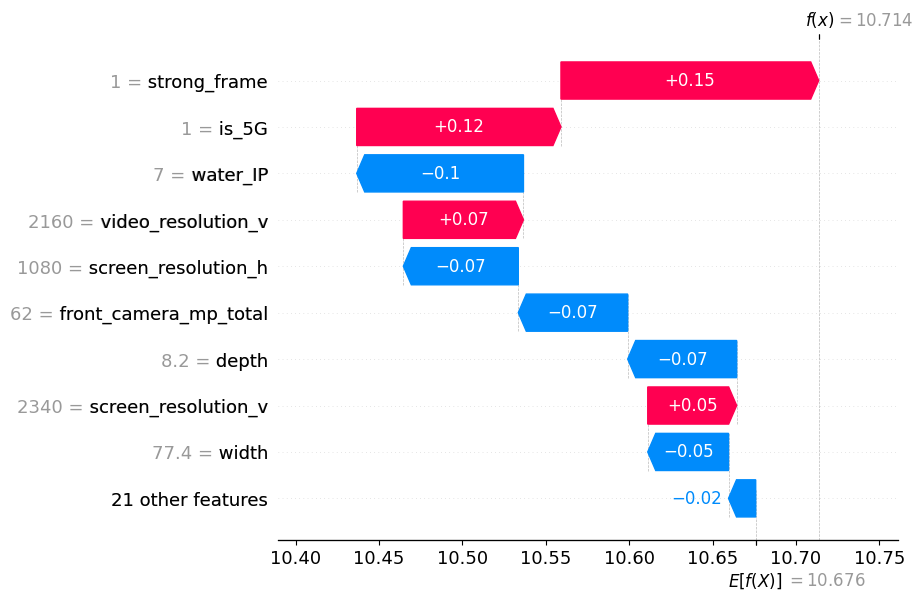


INDEX: 478


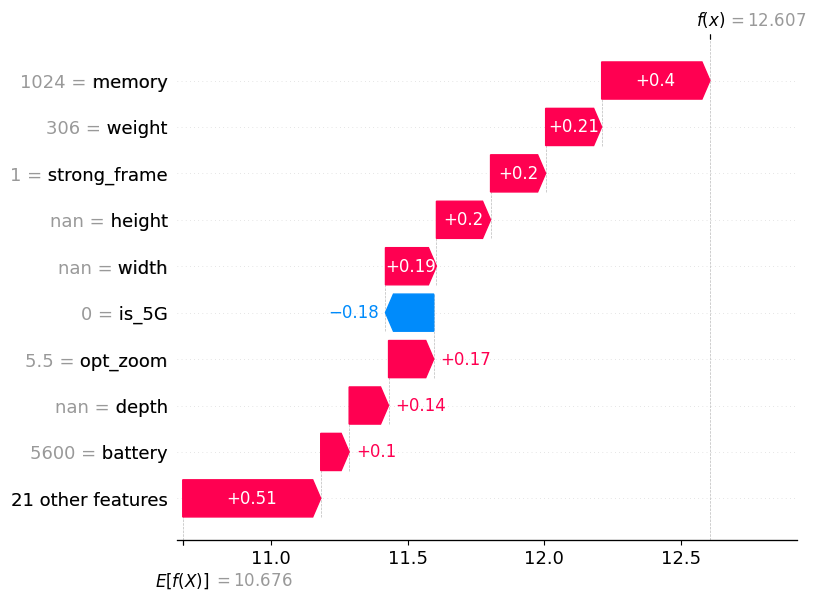

In [87]:
import numpy as np

test_prices = np.expm1(y_test)

cheap_idx = test_prices.idxmin()
mid_idx = (test_prices - test_prices.median()).abs().idxmin()
exp_idx = test_prices.idxmax()

for idx in [cheap_idx, mid_idx, exp_idx]:
    print("\nINDEX:", idx)
    
    shap.plots.waterfall(
        shap.Explanation(
            values=shap_values[X_test.index.get_loc(idx)],
            base_values=explainer.expected_value,
            data=X_test.loc[idx],
            feature_names=X_test.columns
        ),
        max_display=10   # показываем только топ-12 факторов
    )

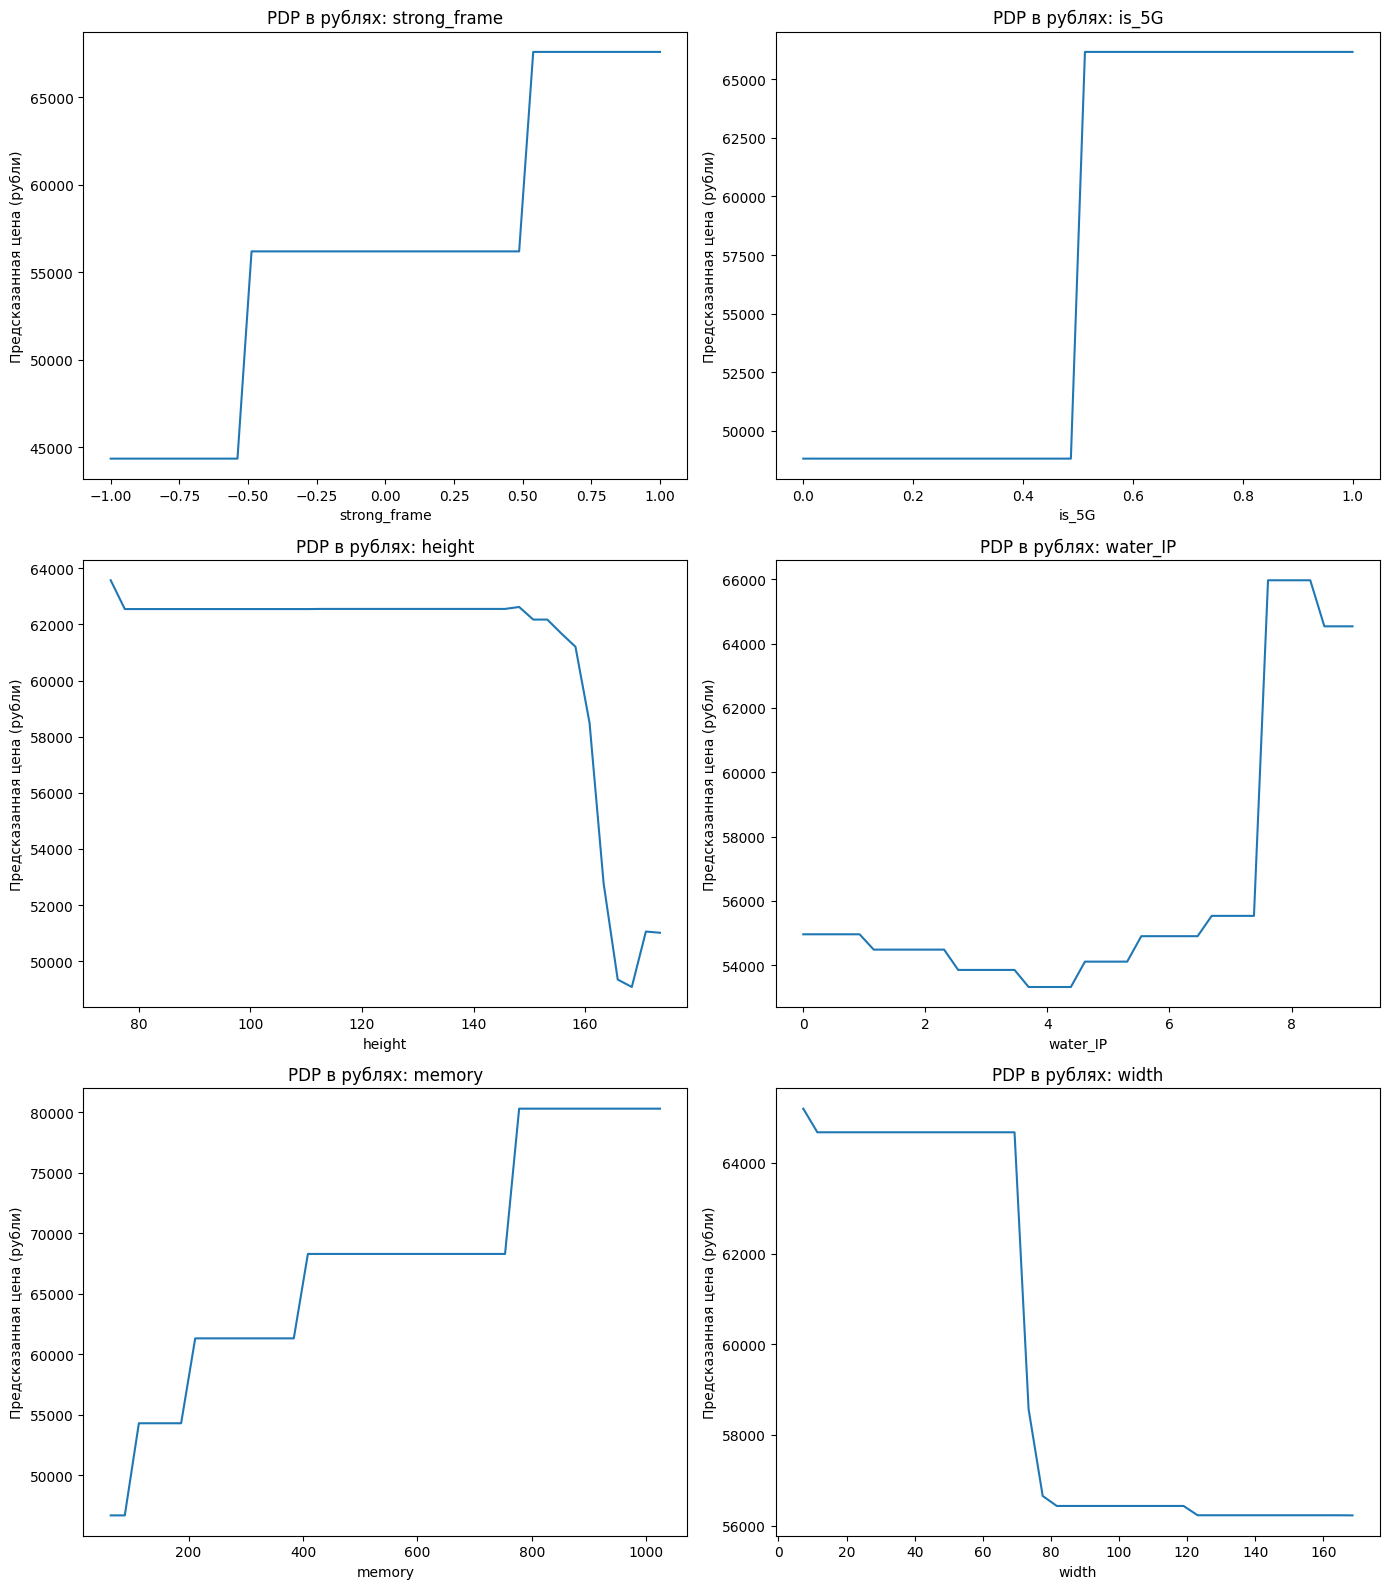

In [ ]:
def pdp_in_rubles(model, X_ref, feature, grid_points=40):
    X_tmp = X_ref.copy()
    grid = np.linspace(X_ref[feature].min(), X_ref[feature].max(), grid_points)

    preds = []
    for val in grid:
        X_tmp[feature] = val
        pred_log = model.predict(X_tmp)
        pred = np.expm1(pred_log)
        preds.append(pred.mean())

    return grid, np.array(preds)

features_for_pdp = ["strong_frame", "is_5G", "width", "screen_resolution_h", "screen_resolution_v", "main_camera_mp_total"]

strong_frame	0.163125
16	is_5G	0.147316
11	water_IP	0.110437
2	height	0.095376
1	memory	0.079263
3	width	0.075508
5	video_resolution_v	0.071885
4	depth	0.067685
0	main_cams	0.059079
21	main_camera_mp_total	0.058143
14	is_new	0.055354
7	screen_resolution_h	0.048914
8	screen_resolution_v	0.047254
18	year	0.042457
20	front_camera_mp_total

fig, axes = plt.subplots(3, 2, figsize=(14, 16))
axes = axes.flatten()

for i, feature in enumerate(features_for_pdp):
    grid, preds = pdp_in_rubles(final_cb, X_test, feature)
    
    axes[i].plot(grid, preds)
    axes[i].set_title(f"PDP в рублях: {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Предсказанная цена (рубли)")

plt.tight_layout()
plt.show()

PyALE._ALE_generic:INFO: Discrete feature detected.


<Figure size 700x400 with 0 Axes>

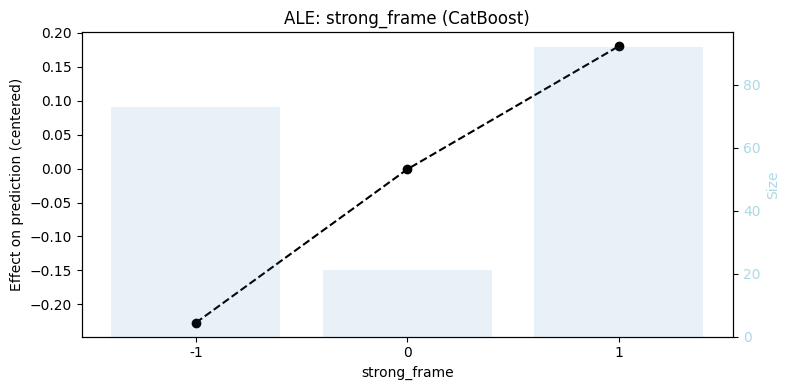

PyALE._ALE_generic:INFO: Discrete feature detected.


<Figure size 700x400 with 0 Axes>

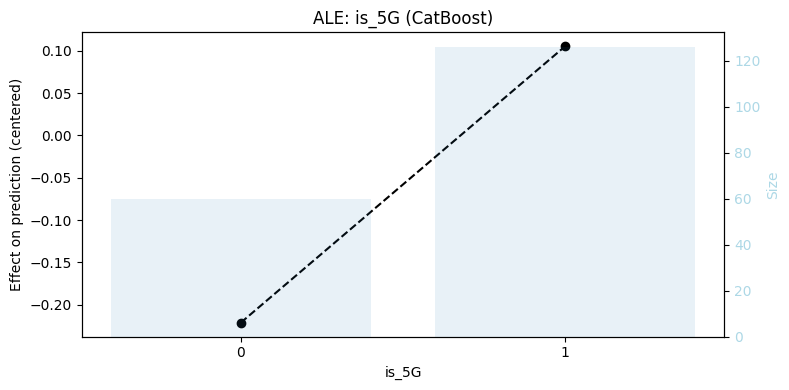

PyALE._ALE_generic:INFO: Discrete feature detected.


<Figure size 700x400 with 0 Axes>

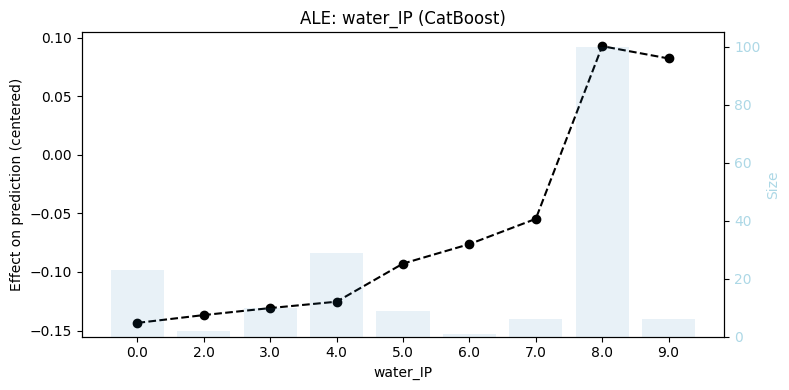

PyALE._ALE_generic:INFO: Continuous feature detected.


ValueError: bins must increase monotonically.

<Figure size 700x400 with 0 Axes>

In [ ]:
from PyALE import ale
import matplotlib.pyplot as plt

features_for_ale = shap_df.head(5)["feature"].tolist()

for feat in features_for_ale:
    plt.figure(figsize=(7,4))
    ale_eff = ale(
        X=X_test,
        model=final_cb,
        feature=[feat],
        grid_size=40,
        include_CI=False
    )
    plt.title(f"ALE: {feat} (CatBoost)")
    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from pyALE import ale
except ImportError:
    from PyALE import ale


def ale_safe(model, X, feature, grid_size=40, feature_type=None, include_CI=False):
    # 1) Убираем строки, где именно этот признак NaN/inf
    mask = X[feature].notna() & np.isfinite(X[feature].astype(float))
    X_sub = X.loc[mask].copy()

    # 2) Для бинарных/мало-уникальных признаков делаем discrete + маленький grid
    nunique = X_sub[feature].nunique(dropna=True)

    if feature_type is None:
        if nunique <= 10:
            feature_type = "discrete"
        else:
            feature_type = "continuous"

    if feature_type == "discrete":
        grid_size = min(grid_size, max(nunique, 2))

    plt.figure(figsize=(8, 4))
    res = ale(
        X=X_sub,
        model=model,
        feature=[feature],
        feature_type=feature_type,
        grid_size=grid_size,
        include_CI=include_CI
    )
    plt.axhline(0, linestyle="--", linewidth=1)
    plt.title(f"ALE: {feature} ({feature_type}) | n={len(X_sub)}")
    plt.xlabel(feature)
    plt.ylabel("Effect on log1p(price)")
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()

    return res

<Figure size 800x400 with 0 Axes>

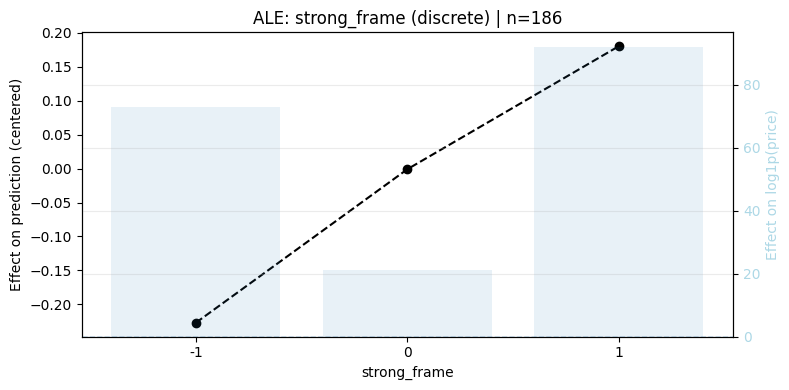

<Figure size 800x400 with 0 Axes>

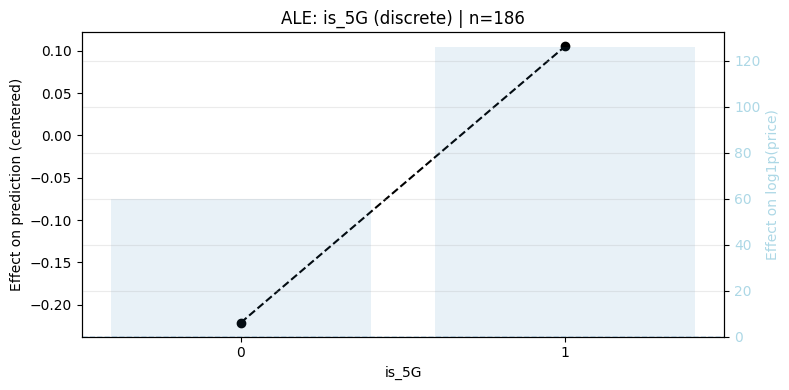

<Figure size 800x400 with 0 Axes>

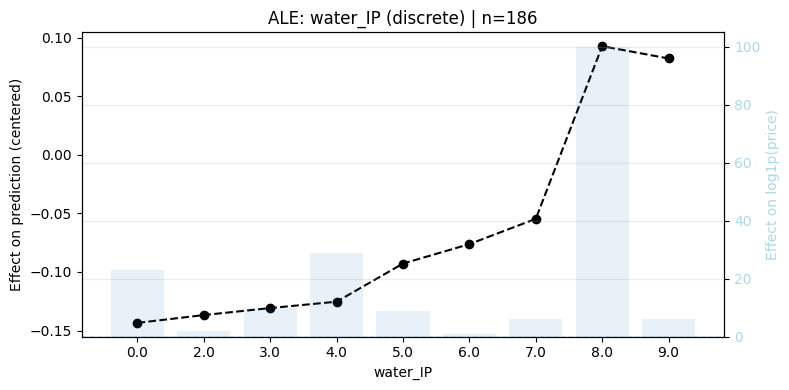

<Figure size 800x400 with 0 Axes>

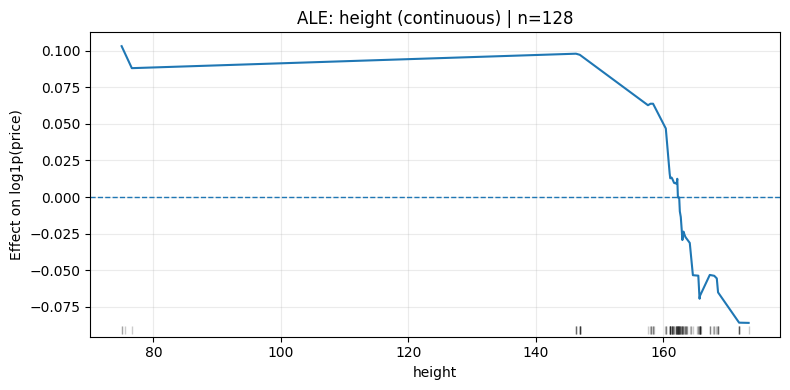

<Figure size 800x400 with 0 Axes>

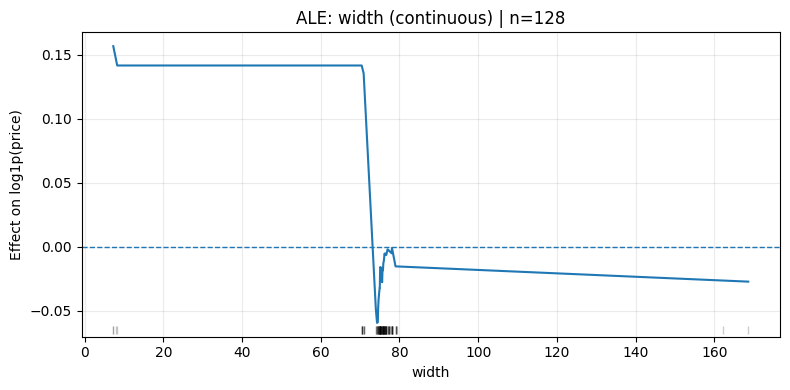

In [ ]:
features_for_ale = shap_df.head(5)["feature"].tolist()

for feat in features_for_ale:
    ale_safe(final_cb, X_test, feat, grid_size=40, include_CI=False)

<Figure size 800x400 with 0 Axes>

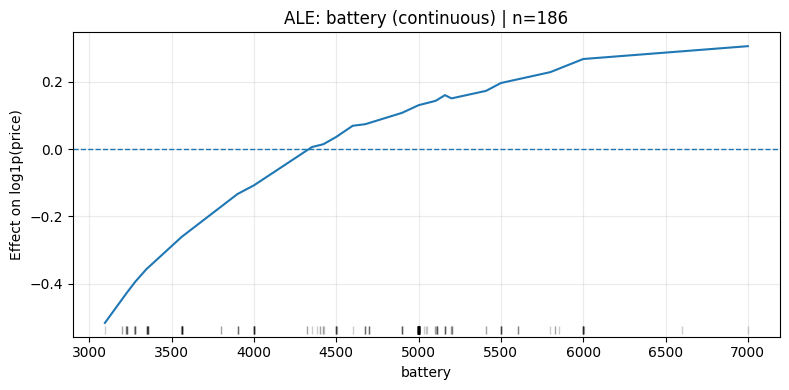

<Figure size 800x400 with 0 Axes>

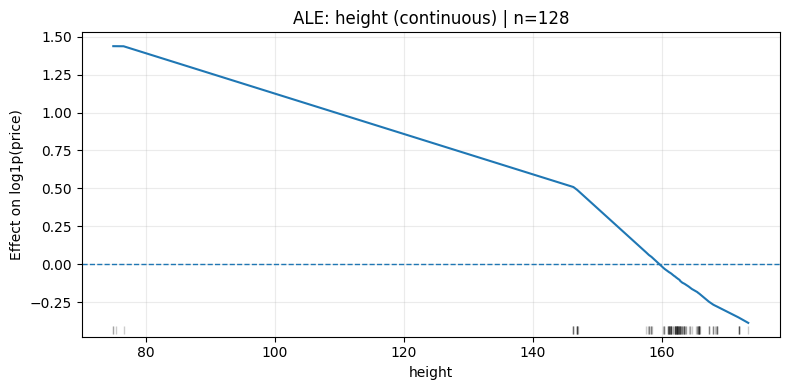

<Figure size 800x400 with 0 Axes>

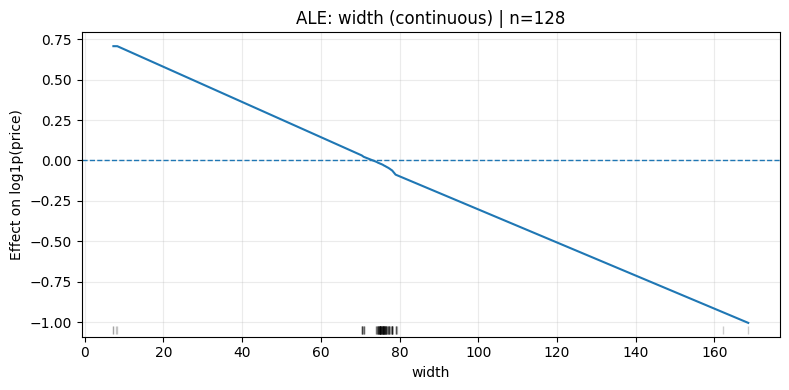

<Figure size 800x400 with 0 Axes>

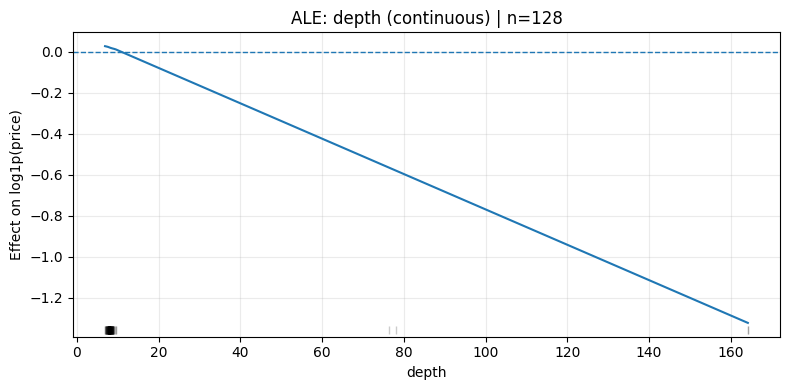

<Figure size 800x400 with 0 Axes>

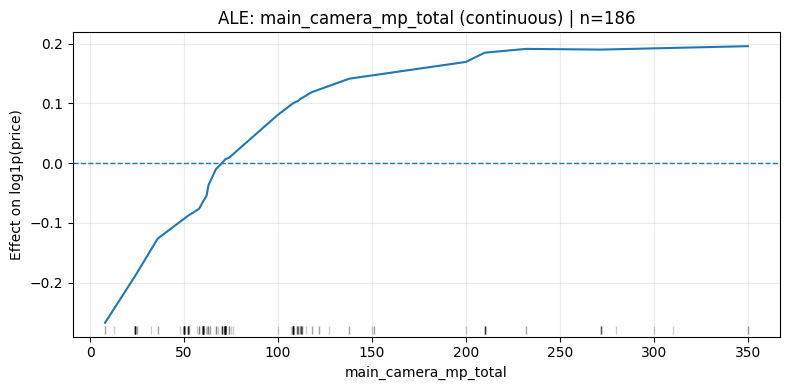

In [ ]:
features_for_ale_svr = imp_df.head(5)["feature"].tolist()

for feat in features_for_ale_svr:
    ale_safe(svr_best, X_test, feat, grid_size=40, include_CI=False)